In [28]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import timeit

import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from coffea.nanoevents.methods import vector

from collections import OrderedDict # to avoid repeating legend for dataset (explained later)

In [2]:
ak.behavior.update(vector.behavior)

# for 3b events
## path to a toyTree file, you will need to modify this
fname_bbbj = '/Users/setay/Desktop/CMU CMS/HH4bsim/events/MG3/TTree/bbbj.root'

events_bbbj = NanoEventsFactory.from_root(fname_bbbj, treepath='Tree', schemaclass=BaseSchema).events()

# you can now access all the data in the tree
print(events_bbbj.fields) # this is a list of all the branches

# for 4b events
## path to a toyTree file, you will need to modify this
fname_bbbb = '/Users/setay/Desktop/CMU CMS/HH4bsim/events/MG3/TTree/bbbb.root'

events_bbbb = NanoEventsFactory.from_root(fname_bbbb, treepath='Tree', schemaclass=BaseSchema).events()

# you can now access all the data in the tree
print(events_bbbb.fields) # this is a list of all the branches

# for signal events
## path to a toyTree file, you will need to modify this
fname_signal = '/Users/setay/Desktop/CMU CMS/HH4bsim/events/MG3/TTree/HH4b.root'

events_signal = NanoEventsFactory.from_root(fname_signal, treepath='Tree', schemaclass=BaseSchema).events()

# you can now access all the data in the tree
print(events_signal.fields) # this is a list of all the branches

['nJets', 'jetPt', 'jetEta', 'jetPhi', 'jetEnergy', 'dRjjClose', 'dRjjOther', 'aveAbsEta', 'm4j', 'pt4j', 'mHH', 'SB', 'CR', 'SR', 'weight', 'w_HH_OT__pl_emd_p1_R0_4__K_1', 'SvB', 'FvT', 'w_HH_Comb_FvT__pl_emd_p1_R0_4__cl_np799_l0_01_e10', 'w_HH_FvT__cl_np799_l0_01_e10', 'w_benchmark', 'w_HH_OT__pl_emd_p1_R0_4__K_10', 'w_HH_OT__pl_emd_p1_R0_4__K_100', 'w_HH_OT__pl_emd_p1_R0_4__K_20']
['nJets', 'jetPt', 'jetEta', 'jetPhi', 'jetEnergy', 'dRjjClose', 'dRjjOther', 'aveAbsEta', 'm4j', 'pt4j', 'mHH', 'SB', 'CR', 'SR', 'weight', 'SvB', 'FvT']
['nJets', 'jetPt', 'jetEta', 'jetPhi', 'jetEnergy', 'dRjjClose', 'dRjjOther', 'aveAbsEta', 'm4j', 'pt4j', 'mHH', 'SB', 'CR', 'SR', 'weight', 'SvB', 'FvT']


C:\Users\setay\anaconda3\lib\site-packages\coffea\nanoevents\mapping\uproot.py:75: UserWarning: Found duplicate branch SvB in <TTree 'Tree' (19 branches) at 0x014e7534cb80>, taking first instance
  warnings.warn(
C:\Users\setay\anaconda3\lib\site-packages\coffea\nanoevents\mapping\uproot.py:75: UserWarning: Found duplicate branch FvT in <TTree 'Tree' (19 branches) at 0x014e7534cb80>, taking first instance
  warnings.warn(
C:\Users\setay\anaconda3\lib\site-packages\coffea\nanoevents\mapping\uproot.py:75: UserWarning: Found duplicate branch SvB in <TTree 'Tree' (19 branches) at 0x014e75765250>, taking first instance
  warnings.warn(
C:\Users\setay\anaconda3\lib\site-packages\coffea\nanoevents\mapping\uproot.py:75: UserWarning: Found duplicate branch FvT in <TTree 'Tree' (19 branches) at 0x014e75765250>, taking first instance
  warnings.warn(


In [3]:
# for 3b events
## Making 4-vectors to play with
events_bbbj['jetMass'] = 0 # we will set the jet masses to zero for our toy example
events_bbbj['jet'] = ak.zip({'pt'  : events_bbbj.jetPt,
                        'eta' : events_bbbj.jetEta,
                        'phi' : events_bbbj.jetPhi,
                        'mass': events_bbbj.jetMass,
           }, with_name='PtEtaPhiMLorentzVector')

# for 4b events
## Making 4-vectors to play with
events_bbbb['jetMass'] = 0 # we will set the jet masses to zero for our toy example
events_bbbb['jet'] = ak.zip({'pt'  : events_bbbb.jetPt,
                        'eta' : events_bbbb.jetEta,
                        'phi' : events_bbbb.jetPhi,
                        'mass': events_bbbb.jetMass,
           }, with_name='PtEtaPhiMLorentzVector')

# for verified signal events from HH4b file
events_signal['jetMass'] = 0 # we will set the jet masses to zero for our toy example
events_signal['jet'] = ak.zip({'pt'  : events_signal.jetPt,
                        'eta' : events_signal.jetEta,
                        'phi' : events_signal.jetPhi,
                        'mass': events_signal.jetMass,
           }, with_name='PtEtaPhiMLorentzVector')

# 3b Dataset
### Testing on the first event

In [25]:
#create all possible pairing types (pairings read vertically, ie. 1st pair is 2,3 & 0,1 and so on..) --> pairings kept for entire dataset
pairings=[([2,0],[0,1],[0,1]),
        ([3,1],[2,3],[3,2])]

#for bbbj file
dijet_bbbj=events_bbbj.jet[0,pairings[0]]+events_bbbj.jet[0,pairings[1]] #prints out 4-vectors of an event for all pairings

dijet_bbbj['scalar_pt']= events_bbbj.jet.pt[0,pairings[0]]+events_bbbj.jet.pt[0,pairings[1]] #calculate scalar momenta for an event

dijet_bbbj['ind_mass']=(events_bbbj.jet[0,pairings[0]]+events_bbbj.jet[0,pairings[1]]).mass #directly calculate the mass for a given pairing

print('dijet_bbbj mass = ',dijet_bbbj.mass)
print('dijet_bbbj scalar pt = ',dijet_bbbj.scalar_pt)

#axis has to change =2 when entire dataset taken into account
bbbj_sort=ak.argsort(dijet_bbbj.scalar_pt,axis=1,ascending=False) #sorts scalar momenta in order of largest to smallest

#apply sorting
dijet_bbbj=dijet_bbbj[bbbj_sort] #once you sort dijet_bbbj, all associated quantities sort themselves out too 

print()
print('After sorting from smallest to largest:')
print('dijet_bbbj mass = ',dijet_bbbj.mass)
print('dijet_bbbj scalar momenta = ',dijet_bbbj.scalar_pt)
print('dijet_bbbj individual mass = ',dijet_bbbj.ind_mass)

dijet_bbbj mass =  [[117, 145], [110, 148], [126, 263]]
dijet_bbbj scalar pt =  [[103, 141], [132, 112], [129, 116]]

After sorting from smallest to largest:
dijet_bbbj mass =  [[145, 117], [110, 148], [126, 263]]
dijet_bbbj scalar momenta =  [[141, 103], [132, 112], [129, 116]]
dijet_bbbj individual mass =  [[145, 117], [110, 148], [126, 263]]


In [21]:
# this is to calculate which points to filter based on their distance to the Higgs mass
def dist_2pts(x_pt,y_pt): #formula for distance between two points
    dist_bw_2pts=np.sqrt((x_pt-125)**2+(y_pt-125)**2)
    return dist_bw_2pts

In [26]:
# Filtering set of data by removing data point that has smallest distance to Higgs mass
## Calculate distance for the data
dist_bbbj=dist_2pts(dijet_bbbj.ind_mass[:,1],dijet_bbbj.ind_mass[:,0])
print('bbbj distance =',dist_bbbj)

# Set condition to exclude datapoint with smallest distances and pass the others 
dijet_bbbj['passDijetMass'] = (dist_bbbj>np.min(dist_bbbj)) #remove dijet with smallest distance (potential signal) -- get T/F array
print('T/F results =',dijet_bbbj.passDijetMass)

dijet_bbbj.ind_mass=dijet_bbbj.ind_mass[dijet_bbbj.passDijetMass] #input result onto mass array -- get empty array for False value
print('Apply condition to masses:',dijet_bbbj.ind_mass)

dijet_bbbj.ind_mass=dijet_bbbj.ind_mass[ak.any(dijet_bbbj.ind_mass,axis=1,mask_identity=True)] #use ak.any to replace empty with None (so that it can be plotted)
print('Get "None" for empty array:',dijet_bbbj.ind_mass)

bbbj distance = [21.9, 27.1, 138]
T/F results = [[False, False], [True, True], [True, True]]
Apply condition to masses: [[], [110, 148], [126, 263]]
Get "None" for empty array: [None, [110, 148], [126, 263]]


<IPython.core.display.Javascript object>


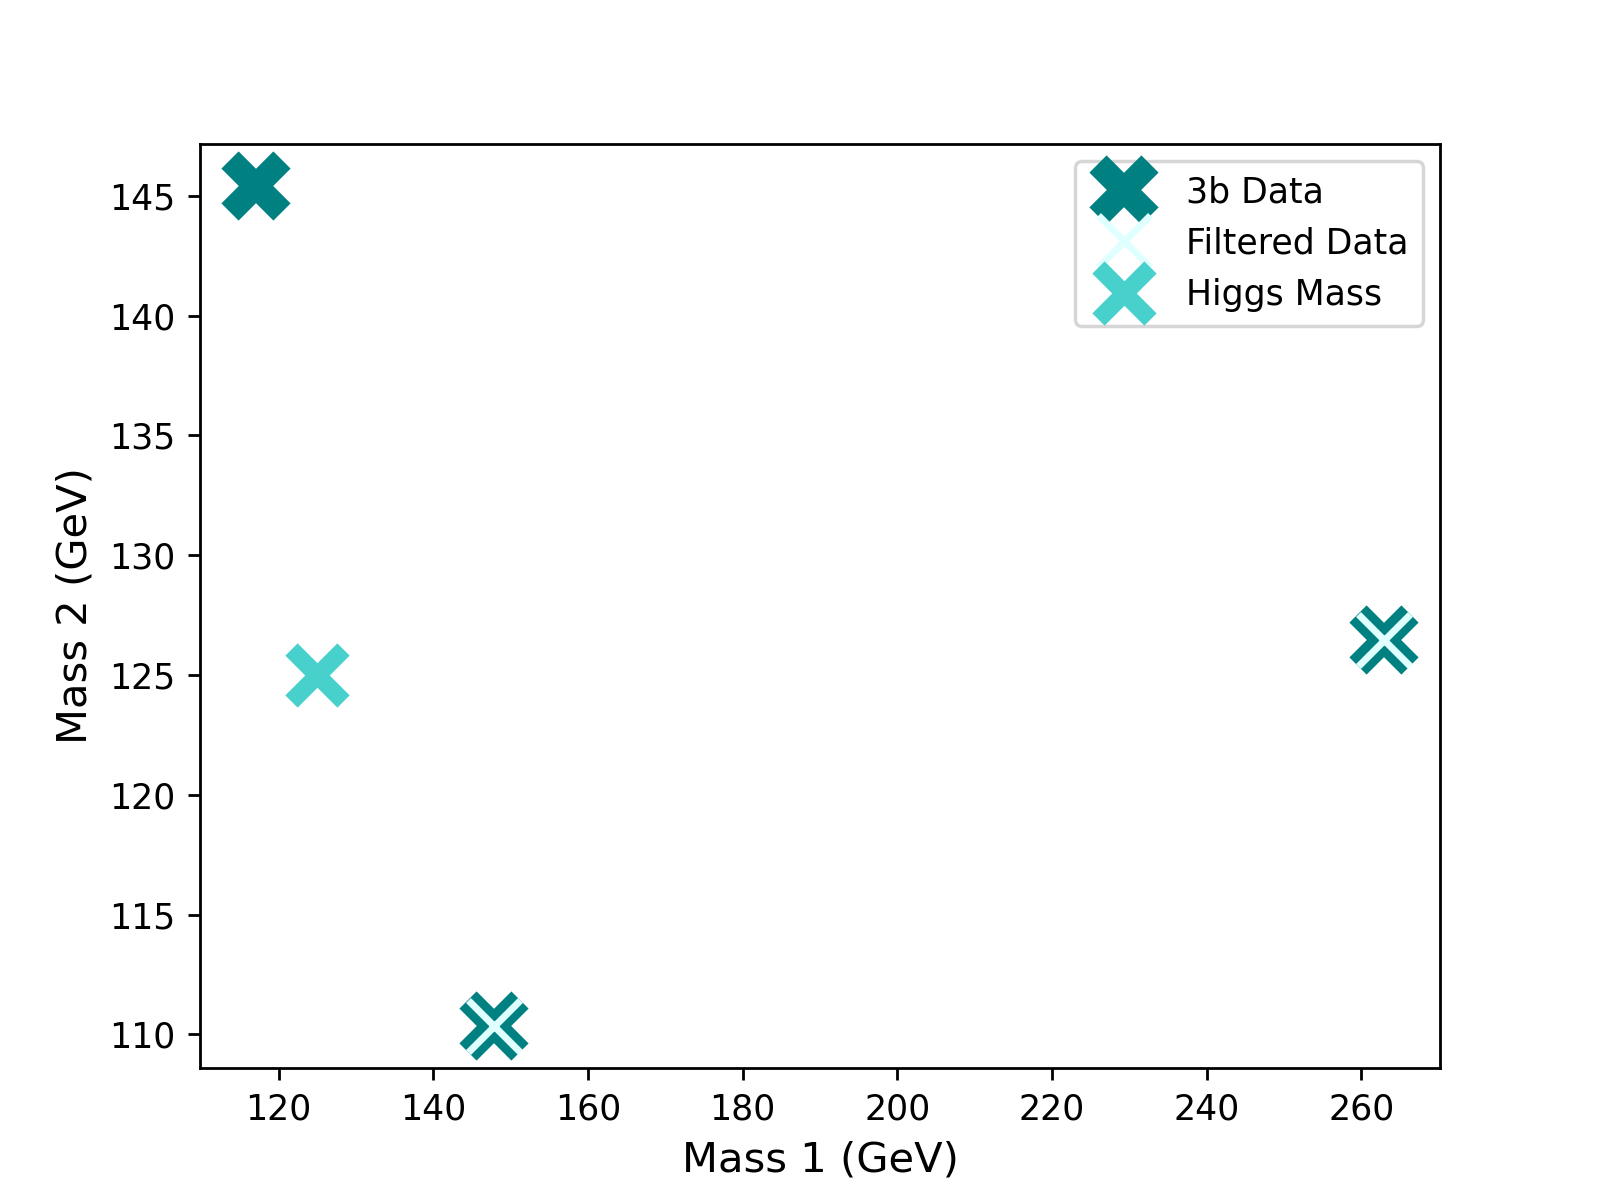

In [27]:
plt.figure()

# Plot all data masses
## Our flitering has largest scalar momenta as 0th input, thus that is plotted on the y-axis
plt.plot(dijet_bbbj.mass[:,1],dijet_bbbj.mass[:,0],marker='x',mew=7,markersize=15,linestyle='None',color='teal',label='3b Data')
# Plot filtered data (ie. with smallest distance datapoint excluded)
plt.plot(dijet_bbbj.ind_mass[:,1],dijet_bbbj.ind_mass[:,0],marker='x',mew=2,linestyle='None',markersize=15,color='lightcyan',label='Filtered Data')
# Plot Higgs mass
plt.plot(125,125,marker='x',mew=5,markersize=15,color='mediumturquoise',linestyle='None',label='Higgs Mass')

plt.xlabel('Mass 1 (GeV)',fontsize='large')
plt.ylabel('Mass 2 (GeV)',fontsize='large')
plt.legend()
plt.show()

### To understand mechanism, repeat for 3 events

In [33]:
#for bbbj file
dijet_bbbj=events_bbbj.jet[0:3,pairings[0]]+events_bbbj.jet[0:3,pairings[1]] #prints out 4-vectors for all pairings combinations of events of choice

dijet_bbbj['scalar_pt']= events_bbbj.jet.pt[0:3,pairings[0]]+events_bbbj.jet.pt[0:3,pairings[1]] #calculate scalar momenta for given set of events

dijet_bbbj['ind_mass']=(events_bbbj.jet[0:3,pairings[0]]+events_bbbj.jet[0:3,pairings[1]]).mass #calculate mass for a given pairing for a given set of events

print('dijet_bbbj mass = ',dijet_bbbj.mass)
print('dijet_bbbj scalar pt = ',dijet_bbbj.scalar_pt)

#axis has to change =2 when entire dataset taken into account
bbbj_sort=ak.argsort(dijet_bbbj.scalar_pt,axis=2,ascending=False) #sorts scalar momenta in order of largest to smallest

dijet_bbbj=dijet_bbbj[bbbj_sort] #once you sort dijet_bbbj, all associated quantities sort themselves out too 

print('sorted bbbj mass = ',dijet_bbbj.mass)
print('sorted individual bbbj mass = ',dijet_bbbj.ind_mass)
print('sorted bbbj momenta = ',dijet_bbbj.scalar_pt)

dijet_bbbj mass =  [[[117, 145], [110, 148], [126, 263]], ... [[102, 162], [111, 112], [92.4, 143]]]
dijet_bbbj scalar pt =  [[[103, 141], [132, 112], [129, 116]], ... [[112, 163], [157, 118], [151, 124]]]
sorted bbbj mass =  [[[145, 117], [110, 148], [126, 263]], ... [[162, 102], [111, 112], [92.4, 143]]]
sorted individual bbbj mass =  [[[145, 117], [110, 148], [126, 263]], ... [[162, 102], [111, 112], [92.4, 143]]]
sorted bbbj momenta =  [[[141, 103], [132, 112], [129, 116]], ... [[163, 112], [157, 118], [151, 124]]]


In [34]:
# Calculate distances for dataset
dist_bbbj=dist_2pts(dijet_bbbj.ind_mass[:,:,1],dijet_bbbj.ind_mass[:,:,0])
print('bbbj distance =',dist_bbbj)

# sort distances from smallest to largest
bbbj_dist_sort=ak.argsort(dist_bbbj,axis=1,ascending=True)

# Then can assign to pass distances that are greater than the minima -- gives True/False values
dijet_bbbj['passDijetMass'] = dist_bbbj>dist_bbbj[bbbj_dist_sort][:,0]
print('T/F results =',dijet_bbbj.passDijetMass)

# Input this for your masses -- this gives empty arrays for smallest distances
dijet_bbbj.ind_mass=dijet_bbbj.ind_mass[dijet_bbbj.passDijetMass] #input result onto mass array -- get empty array for False value
print('Apply condition to masses:',dijet_bbbj.ind_mass)

# Repalce empty arrays with None so that it can be plotted
dijet_bbbj.ind_mass=dijet_bbbj.ind_mass[ak.any(dijet_bbbj.ind_mass,axis=2,mask_identity=True)] #use ak.any to replace empty with None (so that it can be plotted)
print('Get "None" for empty array:',dijet_bbbj.ind_mass)

bbbj distance = [[21.9, 27.1, 138], [40.3, 24.1, 130], [43.3, 19.7, 37.4]]
T/F results = [[[False, False], [True, True], [True, ... True], [False, False], [True, True]]]
Apply condition to masses: [[[], [110, 148], [126, 263]], ... [], [43.3, 23.4]], [[162, 102], [], [92.4, 143]]]
Get "None" for empty array: [[None, [110, 148], [126, 263]], ... [43.3, 23.4]], [[162, 102], None, [92.4, 143]]]


<IPython.core.display.Javascript object>


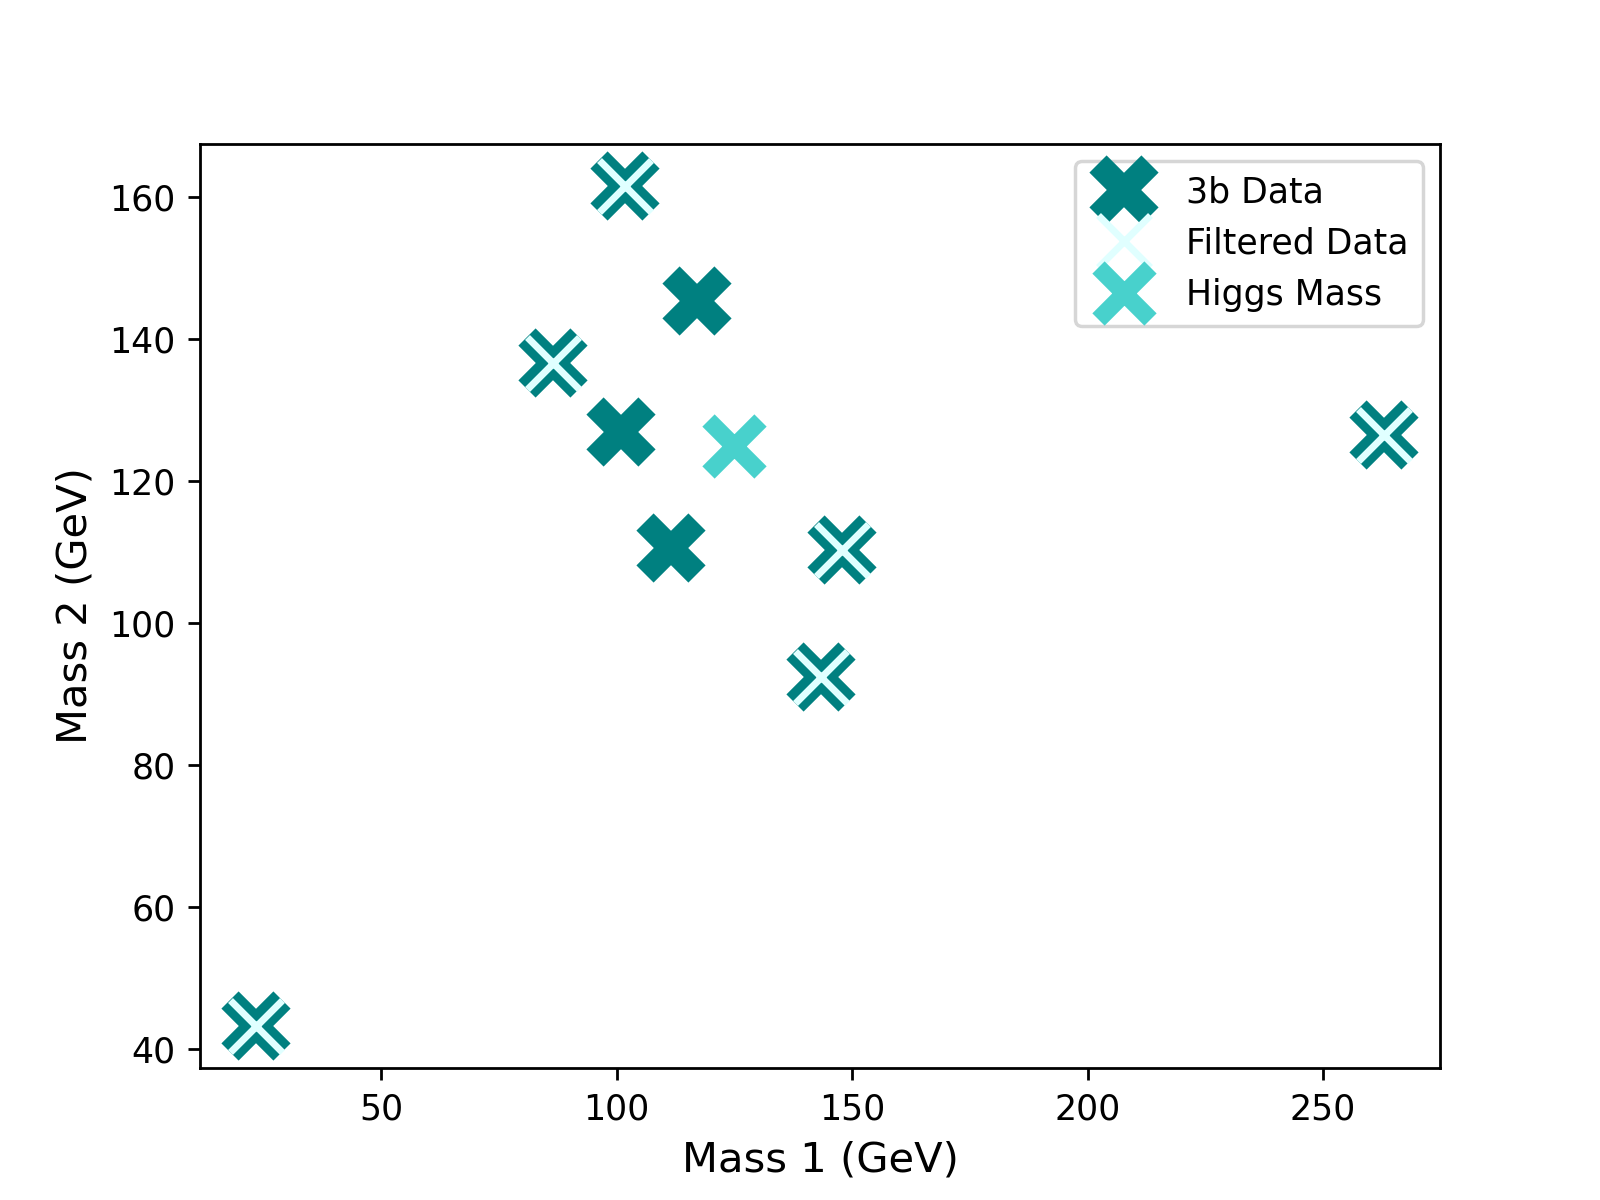

In [35]:
plt.figure()

# Plot all data masses
plt.plot(dijet_bbbj.mass[:,:,1],dijet_bbbj.mass[:,:,0],marker='x',mew=7,markersize=15,linestyle='None',color='teal',label='3b Data')
# Plot filtered data (ie. with smallest distance datapoint excluded)
plt.plot(dijet_bbbj.ind_mass[:,:,1],dijet_bbbj.ind_mass[:,:,0],marker='x',mew=2,linestyle='None',markersize=15,color='lightcyan',label='Filtered Data')
# Plot Higgs mass
plt.plot(125,125,marker='x',mew=5,markersize=15,color='mediumturquoise',linestyle='None',label='Higgs Mass')

# To stop repeating legend
## https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Mass 1 (GeV)',fontsize='large')
plt.ylabel('Mass 2 (GeV)',fontsize='large')

plt.show()

### Repeat process for entire dataset 
All events considered

In [36]:
#for bbbj file
dijet_bbbj=events_bbbj.jet[:,pairings[0]]+events_bbbj.jet[:,pairings[1]] #prints out pairing combinations for all events

dijet_bbbj['scalar_pt']= events_bbbj.jet.pt[:,pairings[0]]+events_bbbj.jet.pt[:,pairings[1]] #calculate scalar momenta for all events

dijet_bbbj['ind_mass']=(events_bbbj.jet[:,pairings[0]]+events_bbbj.jet[:,pairings[1]]).mass #calculate mass for pairings for all events

print('dijet_bbbj mass = ',dijet_bbbj.mass)
print('dijet_bbbj scalar pt = ',dijet_bbbj.scalar_pt)

#axis has to change =2 when entire dataset taken into account
bbbj_sort=ak.argsort(dijet_bbbj.scalar_pt,axis=2,ascending=False) #sorts scalar momenta in order of largest to smallest

dijet_bbbj=dijet_bbbj[bbbj_sort] #once you sort dijet_bbbj, all associated quantities sort themselves out too 

print('sorted bbbj mass = ',dijet_bbbj.mass)
print('sorted individual bbbj mass = ',dijet_bbbj.ind_mass)
print('sorted bbbj momenta = ',dijet_bbbj.scalar_pt)

dijet_bbbj mass =  [[[117, 145], [110, 148], [126, 263]], ... [[134, 177], [149, 149], [36, 51.6]]]
dijet_bbbj scalar pt =  [[[103, 141], [132, 112], [129, 116]], ... [[123, 163], [149, 137], [145, 142]]]
sorted bbbj mass =  [[[145, 117], [110, 148], [126, 263]], ... [[177, 134], [149, 149], [36, 51.6]]]
sorted individual bbbj mass =  [[[145, 117], [110, 148], [126, 263]], ... [[177, 134], [149, 149], [36, 51.6]]]
sorted bbbj momenta =  [[[141, 103], [132, 112], [129, 116]], ... [[163, 123], [149, 137], [145, 142]]]


In [163]:
# Calculate distances for dataset
dist_bbbj=dist_2pts(dijet_bbbj.ind_mass[:,:,1],dijet_bbbj.ind_mass[:,:,0])
print('bbbj distance =',dist_bbbj)

# Sort distances from smallest to largest
bbbj_dist_sort=ak.argsort(dist_bbbj,axis=1,ascending=True)

# Then can assign to pass distances that are greater than the minima -- gives True/False values
dijet_bbbj['passDijetMass'] = dist_bbbj>dist_bbbj[bbbj_dist_sort][:,0]
print('T/F results =',dijet_bbbj.passDijetMass)

# Input this for your masses -- this gives empty arrays for smallest distances
dijet_bbbj.ind_mass=dijet_bbbj.ind_mass[dijet_bbbj.passDijetMass] #input result onto mass array -- get empty array for False value
print('Apply condition to masses:',dijet_bbbj.ind_mass)

# Repalce empty arrays with None so that it can be plotted
dijet_bbbj.ind_mass=dijet_bbbj.ind_mass[ak.any(dijet_bbbj.ind_mass,axis=2,mask_identity=True)] #use ak.any to replace empty with None (so that it can be plotted)
print('Get "None" for empty array:',dijet_bbbj.ind_mass)

[[21.9, 27.1, 138], [40.3, 24.1, 130], ... [89.1, 96, 22.1], [53.3, 33.8, 115]]
[[[False, False], [True, True], [True, ... True], [False, False], [True, True]]]
[[[], [110, 148], [126, 263]], [[137, 86.4, ... []], [[177, 134], [], [36, 51.6]]]
[[None, [110, 148], [126, 263]], [[137, ... None], [[177, 134], None, [36, 51.6]]]


<IPython.core.display.Javascript object>


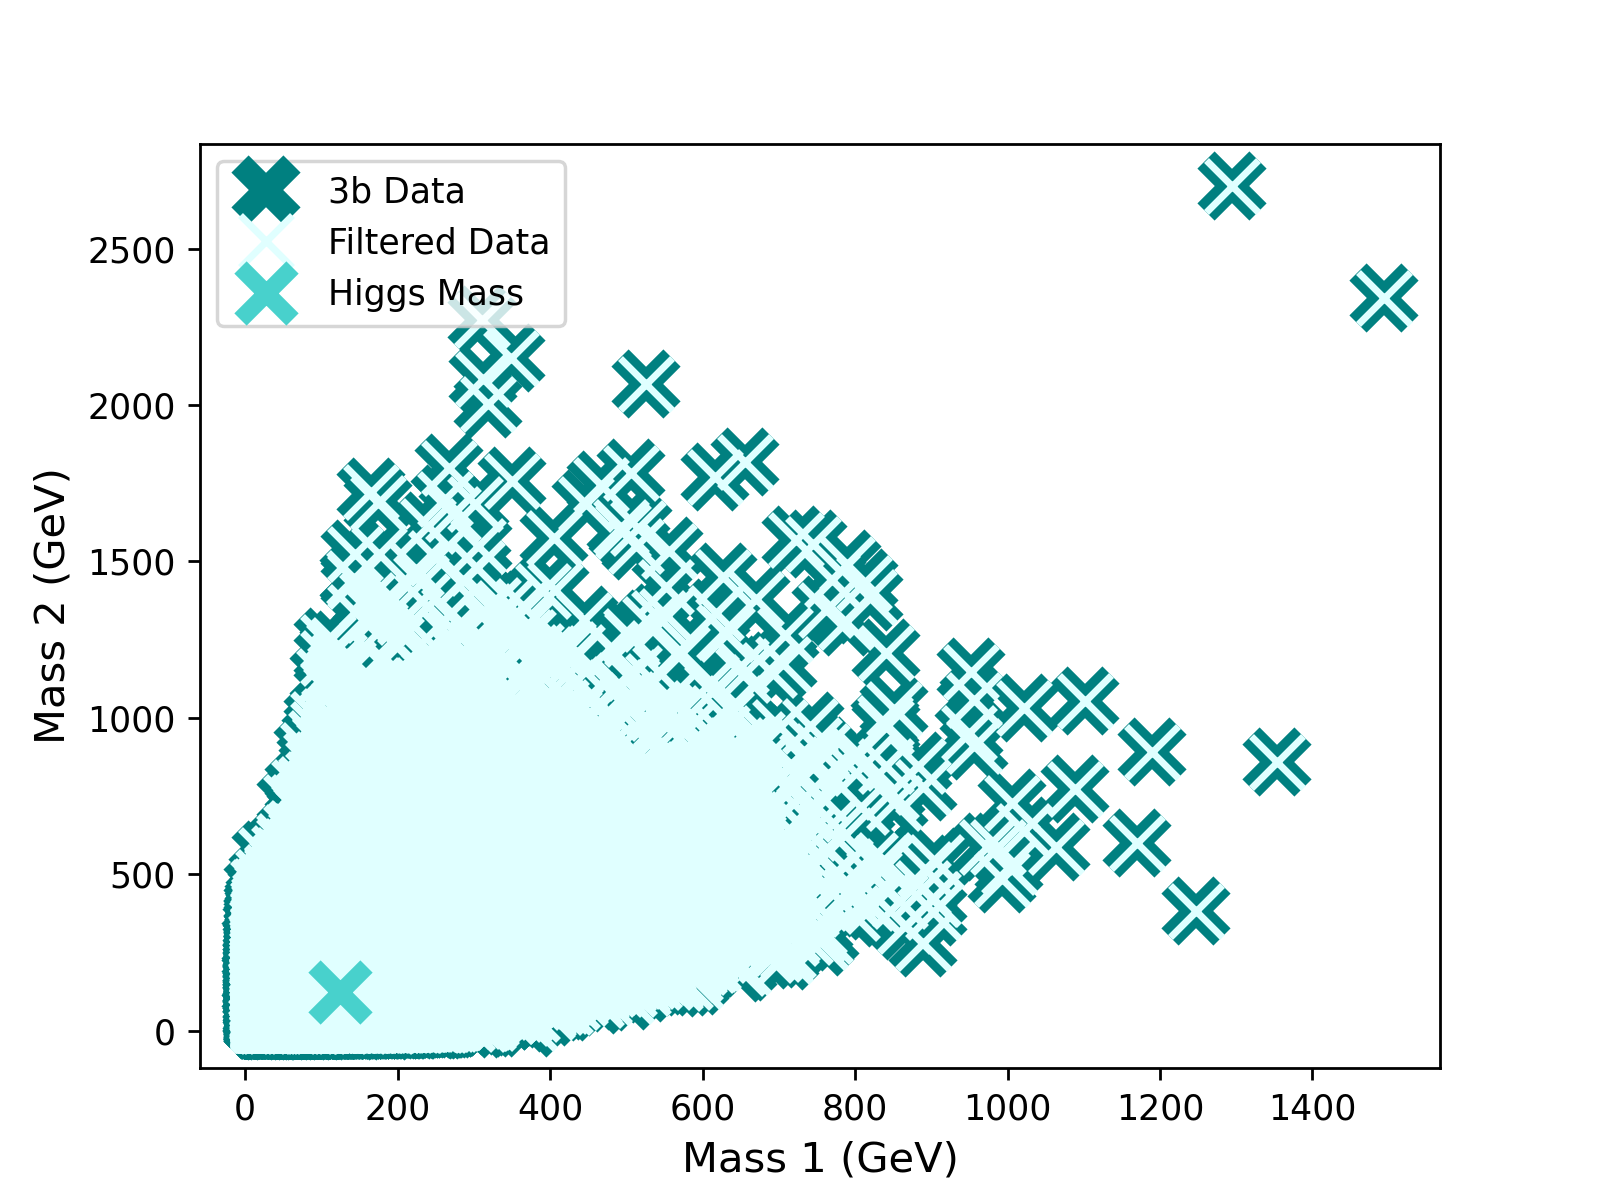

In [37]:
plt.figure()

# Plot all data masses
plt.plot(dijet_bbbj.mass[:,:,1],dijet_bbbj.mass[:,:,0],marker='x',mew=7,markersize=15,linestyle='None',color='teal',label='3b Data')
# Plot filtered data (ie. with smallest distance datapoint excluded)
plt.plot(dijet_bbbj.ind_mass[:,:,1],dijet_bbbj.ind_mass[:,:,0],marker='x',mew=2,linestyle='None',markersize=15,color='lightcyan',label='Filtered Data')
# Plot Higgs mass
plt.plot(125,125,marker='x',mew=5,markersize=15,color='mediumturquoise',linestyle='None',label='Higgs Mass')

# To stop repeating legend
## https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='upper left')

plt.xlabel('Mass 1 (GeV)',fontsize='large')
plt.ylabel('Mass 2 (GeV)',fontsize='large')

plt.show()

# 4B Dataset

### Repeat process for the first 10 events as a check 
Do this prior to applying mechanism to entire dataset

In [38]:
#for bbbb file
dijet_bbbb=events_bbbb.jet[0:50,pairings[0]]+events_bbbb.jet[0:50,pairings[1]] #prints out combinations for an event

dijet_bbbb['scalar_pt']= events_bbbb.jet.pt[0:50,pairings[0]]+events_bbbb.jet.pt[0:50,pairings[1]] #calculate scalar momenta for an event

dijet_bbbb['ind_mass']=(events_bbbb.jet[0:50,pairings[0]]+events_bbbb.jet[0:50,pairings[1]]).mass #calculate mass for a given pairing

print('dijet_bbbb mass = ',dijet_bbbb.mass)
print('dijet_bbbb scalar pt = ',dijet_bbbb.scalar_pt)

#axis has to change =2 when entire dataset taken into account
bbbb_sort=ak.argsort(dijet_bbbb.scalar_pt,axis=2,ascending=False) #sorts scalar momenta in order of largest to smallest

dijet_bbbb=dijet_bbbb[bbbb_sort] #once you sort dijet_bbbb, all associated quantities sort themselves out too 

print('sorted 4b mass = ',dijet_bbbb.mass)
print('sorted individual 4b mass = ',dijet_bbbb.ind_mass)
print('sorted 4b momenta = ',dijet_bbbb.scalar_pt)

dijet_bbbb mass =  [[[103, 176], [129, 108], [84.8, 56]], ... [[116, 108], [273, 55.2], [125, 178]]]
dijet_bbbb scalar pt =  [[[90.2, 189], [169, 110], [163, 116]], ... [[129, 226], [221, 134], [183, 171]]]
sorted 4b mass =  [[[176, 103], [129, 108], [84.8, 56]], ... [[108, 116], [273, 55.2], [125, 178]]]
sorted individual 4b mass =  [[[176, 103], [129, 108], [84.8, 56]], ... [[108, 116], [273, 55.2], [125, 178]]]
sorted 4b momenta =  [[[189, 90.2], [169, 110], [163, 116]], ... [[226, 129], [221, 134], [183, 171]]]


In [39]:
# Calculate distances for dataset
dist_bbbb=dist_2pts(dijet_bbbb.ind_mass[:,:,1],dijet_bbbb.ind_mass[:,:,0])
print('4b distance =',dist_bbbb)

# Sort distances from smallest to largest
bbbb_dist_sort=ak.argsort(dist_bbbb,axis=1,ascending=True)

# Then can assign to pass distances that are greater than the minima -- gives True/False values
dijet_bbbb['passDijetMass'] = dist_bbbb>dist_bbbb[bbbb_dist_sort][:,0]
print('T/F results =',dijet_bbbb.passDijetMass)

# Input this for your masses -- this gives empty arrays for smallest distances
dijet_bbbb.ind_mass=dijet_bbbb.ind_mass[dijet_bbbb.passDijetMass] #input result onto mass array -- get empty array for False value
print('Apply condition to masses:',dijet_bbbb.ind_mass)

# Repalce empty arrays with None so that it can be plotted
dijet_bbbb.ind_mass=dijet_bbbb.ind_mass[ak.any(dijet_bbbb.ind_mass,axis=2,mask_identity=True)] #use ak.any to replace empty with None (so that it can be plotted)
print('Get "None" for empty array:',dijet_bbbb.ind_mass)

4b distance = [[55.7, 17.3, 79.8], [106, 30, 5.12], ... [20, 196, 21.9], [18.7, 163, 53.3]]
T/F results = [[[True, True], [False, False], [True, True, ... False], [True, True], [True, True]]]
Apply condition to masses: [[[176, 103], [], [84.8, 56]], [[26.2, ... 146]], [[], [273, 55.2], [125, 178]]]
Get "None" for empty array: [[[176, 103], None, [84.8, 56]], [[26.2, ... 146]], [None, [273, 55.2], [125, 178]]]


<IPython.core.display.Javascript object>


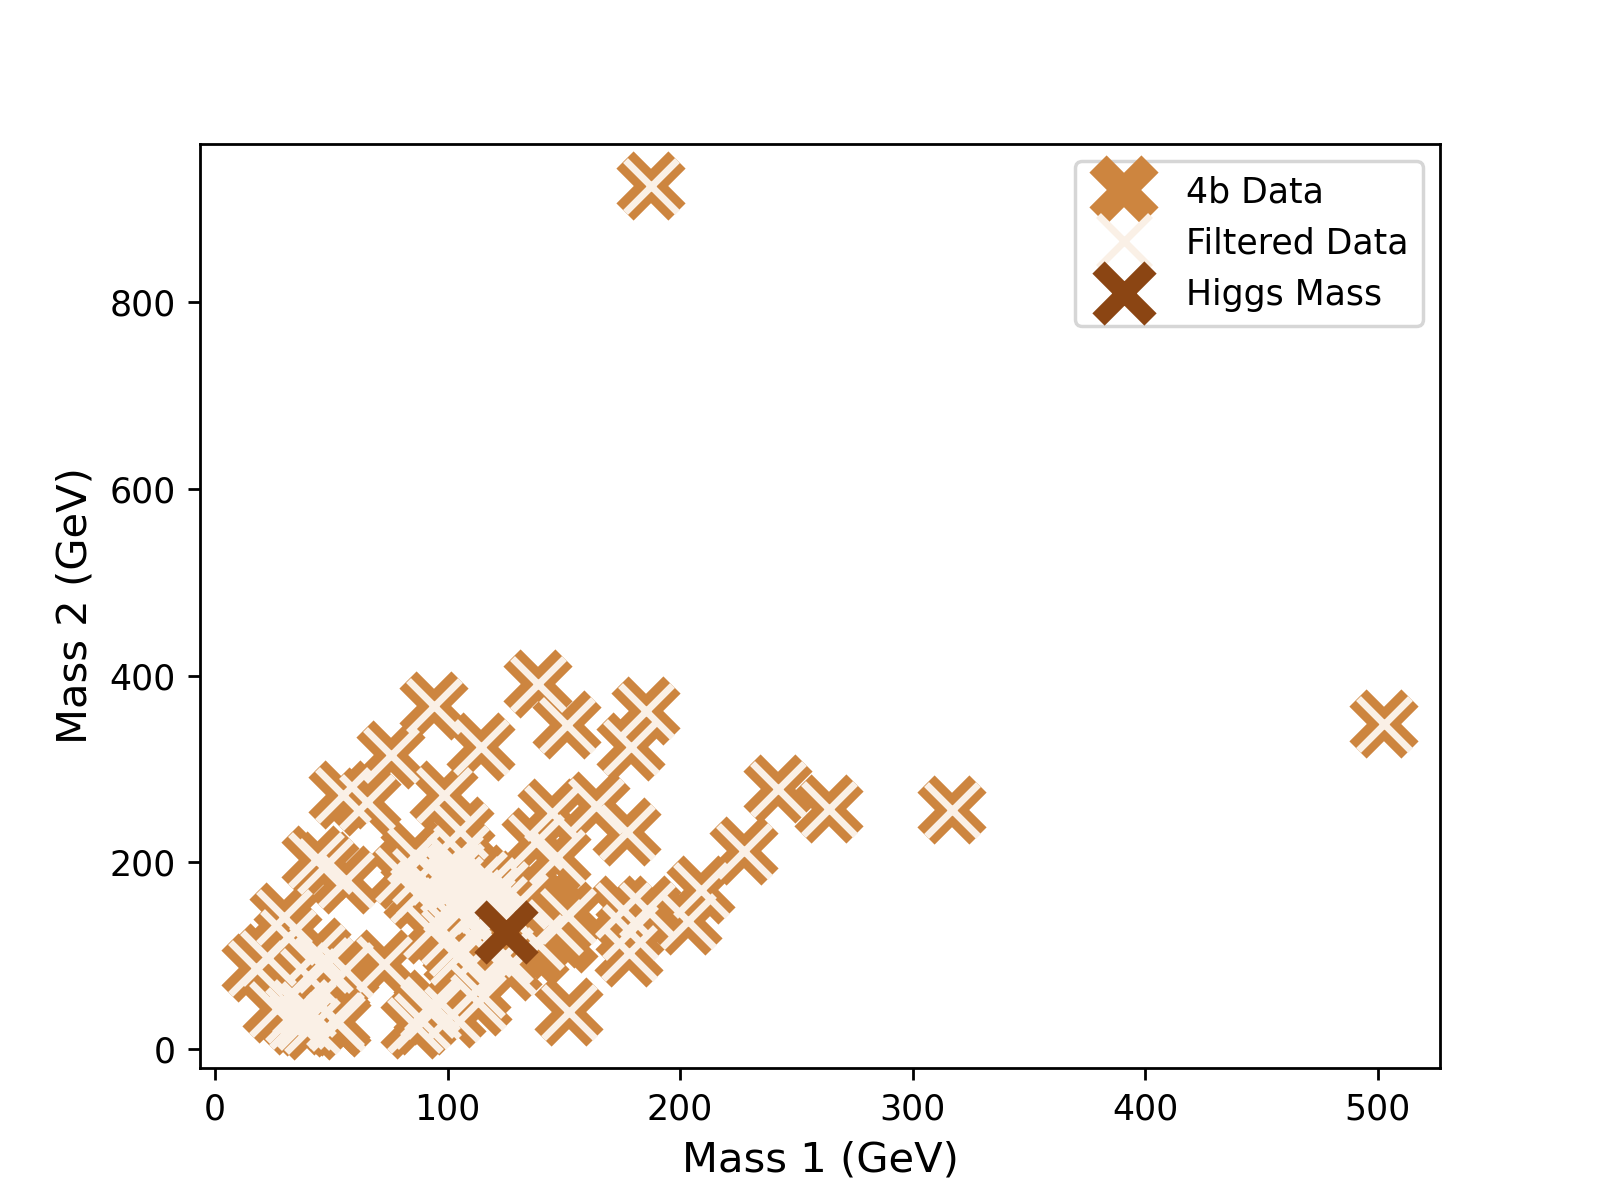

In [40]:
plt.figure()

# Plot all data masses
plt.plot(dijet_bbbb.mass[:,:,1],dijet_bbbb.mass[:,:,0],marker='x',mew=7,markersize=15,linestyle='None',color='peru',label='4b Data')
# Plot filtered data (ie. with smallest distance datapoint excluded)
plt.plot(dijet_bbbb.ind_mass[:,:,1],dijet_bbbb.ind_mass[:,:,0],marker='x',mew=2,linestyle='None',markersize=15,color='linen',label='Filtered Data')
# Plot Higgs mass
plt.plot(125,125,marker='x',mew=5,markersize=15,color='saddlebrown',linestyle='None',label='Higgs Mass')

# to stop repeating legend
## https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Mass 1 (GeV)',fontsize='large')
plt.ylabel('Mass 2 (GeV)',fontsize='large')

plt.show()

### Repeat for entire dataset

In [59]:
#for bbbb file
dijet_bbbb=events_bbbb.jet[:,pairings[0]]+events_bbbb.jet[:,pairings[1]] #prints out pairing combinations for all events

dijet_bbbb['scalar_pt']= events_bbbb.jet.pt[:,pairings[0]]+events_bbbb.jet.pt[:,pairings[1]] #calculate scalar momenta for all events

dijet_bbbb['ind_mass']=(events_bbbb.jet[:,pairings[0]]+events_bbbb.jet[:,pairings[1]]).mass #calculate mass pairings for all events

print('dijet_bbbb mass = ',dijet_bbbb.mass)
print('dijet_bbbb scalar pt = ',dijet_bbbb.scalar_pt)

#axis has to change =2 when entire dataset taken into account
bbbb_sort=ak.argsort(dijet_bbbb.scalar_pt,axis=2,ascending=False) #sorts scalar momenta in order of largest to smallest

dijet_bbbb=dijet_bbbb[bbbb_sort] #once you sort dijet_bbbb, all associated quantities sort themselves out too 

print('sorted 4b mass = ',dijet_bbbb.mass)
print('sorted individual 4b mass = ',dijet_bbbb.ind_mass)
print('sorted 4b momenta = ',dijet_bbbb.scalar_pt)

dijet_bbbb mass =  [[[103, 176], [129, 108], [84.8, 56]], ... [[90.7, 111], [111, 106], [54.9, 40.5]]]
dijet_bbbb scalar pt =  [[[90.2, 189], [169, 110], [163, 116]], ... [[97.3, 114], [113, 98.1], [113, 98.5]]]
sorted 4b mass =  [[[176, 103], [129, 108], [84.8, 56]], ... [[111, 90.7], [111, 106], [54.9, 40.5]]]
sorted individual 4b mass =  [[[176, 103], [129, 108], [84.8, 56]], ... [[111, 90.7], [111, 106], [54.9, 40.5]]]
sorted 4b momenta =  [[[189, 90.2], [169, 110], [163, 116]], ... [[114, 97.3], [113, 98.1], [113, 98.5]]]


In [60]:
# Calculate distances for dataset
dist_bbbb=dist_2pts(dijet_bbbb.ind_mass[:,:,1],dijet_bbbb.ind_mass[:,:,0])
print('4b distance =',dist_bbbb)

# Sort distances from smallest to largest
bbbb_dist_sort=ak.argsort(dist_bbbb,axis=1,ascending=True)

# Then can assign to pass distances that are greater than the minima -- gives True/False values
dijet_bbbb['passDijetMass'] = dist_bbbb>dist_bbbb[bbbb_dist_sort][:,0]
print('T/F results =',dijet_bbbb.passDijetMass)

# Input this for your masses -- this gives empty arrays for smallest distances
dijet_bbbb.ind_mass=dijet_bbbb.ind_mass[dijet_bbbb.passDijetMass] #input result onto mass array -- get empty array for False value
print('Apply condition to masses:',dijet_bbbb.ind_mass)

# Repalce empty arrays with None so that it can be plotted
dijet_bbbb.ind_mass=dijet_bbbb.ind_mass[ak.any(dijet_bbbb.ind_mass,axis=2,mask_identity=True)] #use ak.any to replace empty with None (so that it can be plotted)
print('Get "None" for empty array:',dijet_bbbb.ind_mass)

4b distance = [[55.7, 17.3, 79.8], [106, 30, 5.12], ... [99.9, 11.6, 65.3], [37.1, 23, 110]]
T/F results = [[[True, True], [False, False], [True, ... True], [False, False], [True, True]]]
Apply condition to masses: [[[176, 103], [], [84.8, 56]], [[26.2, ... 151]], [[111, 90.7], [], [54.9, 40.5]]]
Get "None" for empty array: [[[176, 103], None, [84.8, 56]], [[26.2, ... [[111, 90.7], None, [54.9, 40.5]]]


<IPython.core.display.Javascript object>


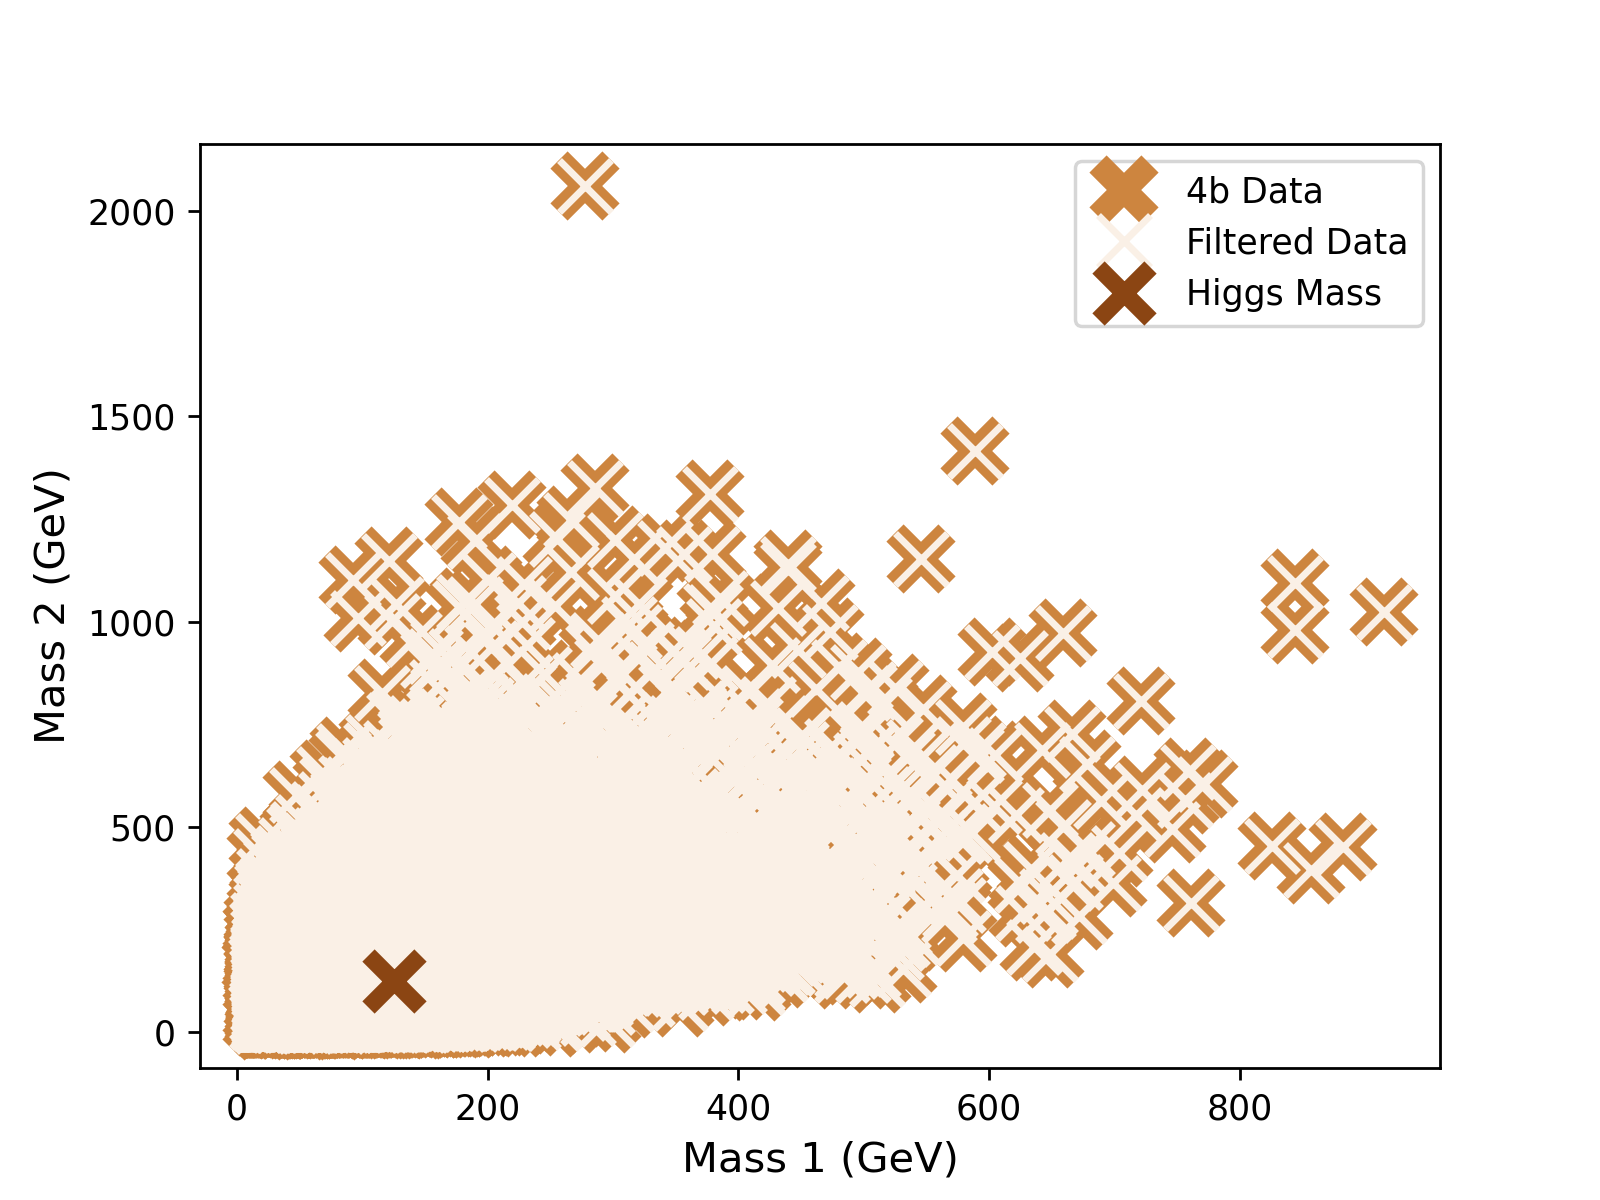

In [45]:
plt.figure()

# Plot all data masses
plt.plot(dijet_bbbb.mass[:,:,1],dijet_bbbb.mass[:,:,0],marker='x',mew=7,markersize=15,linestyle='None',color='peru',label='4b Data')
# Plot filtered data (ie. with smallest distance datapoint excluded)
plt.plot(dijet_bbbb.ind_mass[:,:,1],dijet_bbbb.ind_mass[:,:,0],marker='x',mew=2,linestyle='None',markersize=15,color='linen',label='Filtered Data')
# Plot Higgs mass
plt.plot(125,125,marker='x',mew=5,markersize=15,color='saddlebrown',linestyle='None',label='Higgs Mass')

# To stop repeating legend
## https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Mass 1 (GeV)',fontsize='large')
plt.ylabel('Mass 2 (GeV)',fontsize='large')

plt.show()

### Signal Events

In [52]:
# Make dijets for signal (HH4b) datafile
dijet_signal=events_signal.jet[:,pairings[0]]+events_signal.jet[:,pairings[1]] #prints out pairing combinations for all events

dijet_signal['scalar_pt']= events_signal.jet.pt[:,pairings[0]]+events_signal.jet.pt[:,pairings[1]] #calculate scalar momenta for all events

dijet_signal['ind_mass']=(events_signal.jet[:,pairings[0]]+events_signal.jet[:,pairings[1]]).mass #calculate mass pairings for all events

print('dijet_signal mass = ',dijet_signal.mass)
print('dijet_signal scalar pt = ',dijet_signal.scalar_pt)

#axis has to change =2 when entire dataset taken into account
signal_sort=ak.argsort(dijet_signal.scalar_pt,axis=2,ascending=False) #sorts scalar momenta in order of largest to smallest

dijet_signal=dijet_signal[signal_sort] #once you sort dijet_signal, all associated quantities sort themselves out too 

print('sorted signal mass = ',dijet_signal.mass)
print('sorted individual signal mass = ',dijet_signal.scalar_pt)
print('sorted signal momenta = ',dijet_signal.ind_mass)

dijet_signal mass =  [[[179, 368], [304, 168], [114, 132]], ... [[91.8, 251], [126, 121], [168, 197]]]
dijet_signal scalar pt =  [[[192, 310], [293, 209], [227, 275]], ... [[108, 211], [184, 135], [183, 136]]]
sorted signal mass =  [[[368, 179], [304, 168], [132, 114]], ... [[251, 91.8], [126, 121], [168, 197]]]
sorted individual signal mass =  [[[310, 192], [293, 209], [275, 227]], ... [[211, 108], [184, 135], [183, 136]]]
sorted signal momenta =  [[[368, 179], [304, 168], [132, 114]], ... [[251, 91.8], [126, 121], [168, 197]]]


In [53]:
# Calculate distances for dataset
dist_signal=dist_2pts(dijet_signal.ind_mass[:,:,1],dijet_signal.ind_mass[:,:,0])
print('Signal distance =',dist_signal)

# Sort distances from smallest to largest
signal_dist_sort=ak.argsort(dist_signal,axis=1,ascending=True)

# We want to pass the mass with the closest distance to the Higgs mass and ignore all others
dijet_signal['closest_mass']=(events_signal.jet[:,pairings[0]]+events_signal.jet[:,pairings[1]]).mass 

# Then can assign to pass distances that are equal to the minima -- gives True/False values
dijet_signal['closest'] = dist_signal==dist_signal[signal_dist_sort][:,0]
print('T/F results =',dijet_signal.closest)

# Input this for your masses -- this gives empty arrays for all other distances that aren't the minima
dijet_signal.closest_mass=dijet_signal.closest_mass[dijet_signal.closest] #input result onto mass array -- get empty array for False value
print('Apply condition to masses:',dijet_signal.closest)

# Repalce empty arrays with None so that it can be plotted
dijet_signal.closest_mass=dijet_signal.closest_mass[ak.any(dijet_signal.closest_mass,axis=2,mask_identity=True)] #use ak.any to replace empty with None (so that it can be plotted)
print('Get "None" for empty array:',dijet_signal.closest_mass)

Signal distance = [[249, 184, 13.1], [136, 12.4, 84.8], ... [520, 505, 2.33], [130, 3.69, 84.1]]
T/F results = [[[False, False], [False, False], [True, ... False], [True, True], [False, False]]]
Apply condition to masses: [[[False, False], [False, False], [True, ... False], [True, True], [False, False]]]
Get "None" for empty array: [[None, None, [114, 132]], [None, [134, ... 123, 126]], [None, [126, 121], None]]


<IPython.core.display.Javascript object>


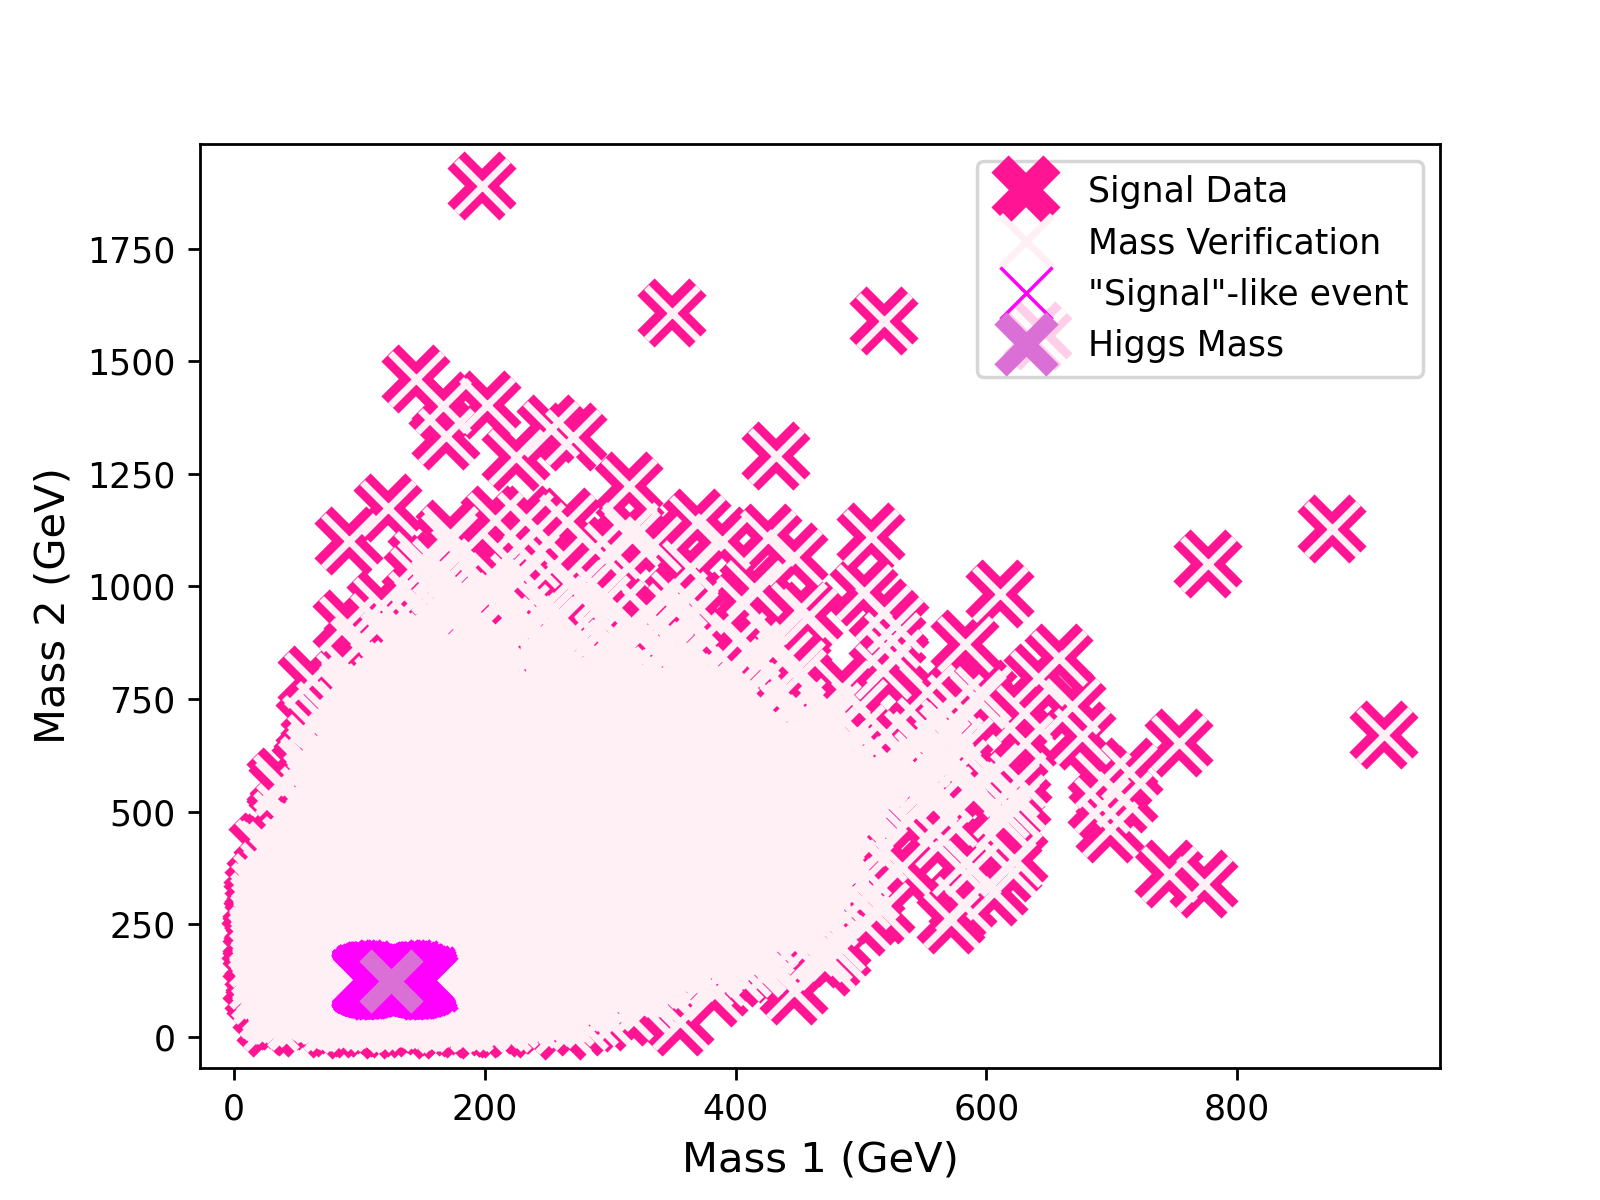

In [54]:
plt.figure()

# Plot all data masses
plt.plot(dijet_signal.mass[:,:,1],dijet_signal.mass[:,:,0],marker='x',mew=7,markersize=15,linestyle='None',color='deeppink',label='Signal Data')
# Verify all data points with individual mass calculations 
plt.plot(dijet_signal.ind_mass[:,:,1],dijet_signal.ind_mass[:,:,0],marker='x',mew=2,linestyle='None',markersize=15,color='lavenderblush',label='Mass Verification')
# Plot all masses closest to the Higgs mass for a given event
plt.plot(dijet_signal.closest_mass[:,:,1],dijet_signal.closest_mass[:,:,0],marker='x',mew=1,linestyle='None',markersize=15,color='magenta',label='"Signal"-like event')
# PLot Higgs mass
plt.plot(125,125,marker='x',mew=5,markersize=15,color='orchid',linestyle='None',label='Higgs Mass')

# to stop repeating legend
## https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Mass 1 (GeV)',fontsize='large')
plt.ylabel('Mass 2 (GeV)',fontsize='large')

plt.show()

### Making 4b Histogram

<IPython.core.display.Javascript object>


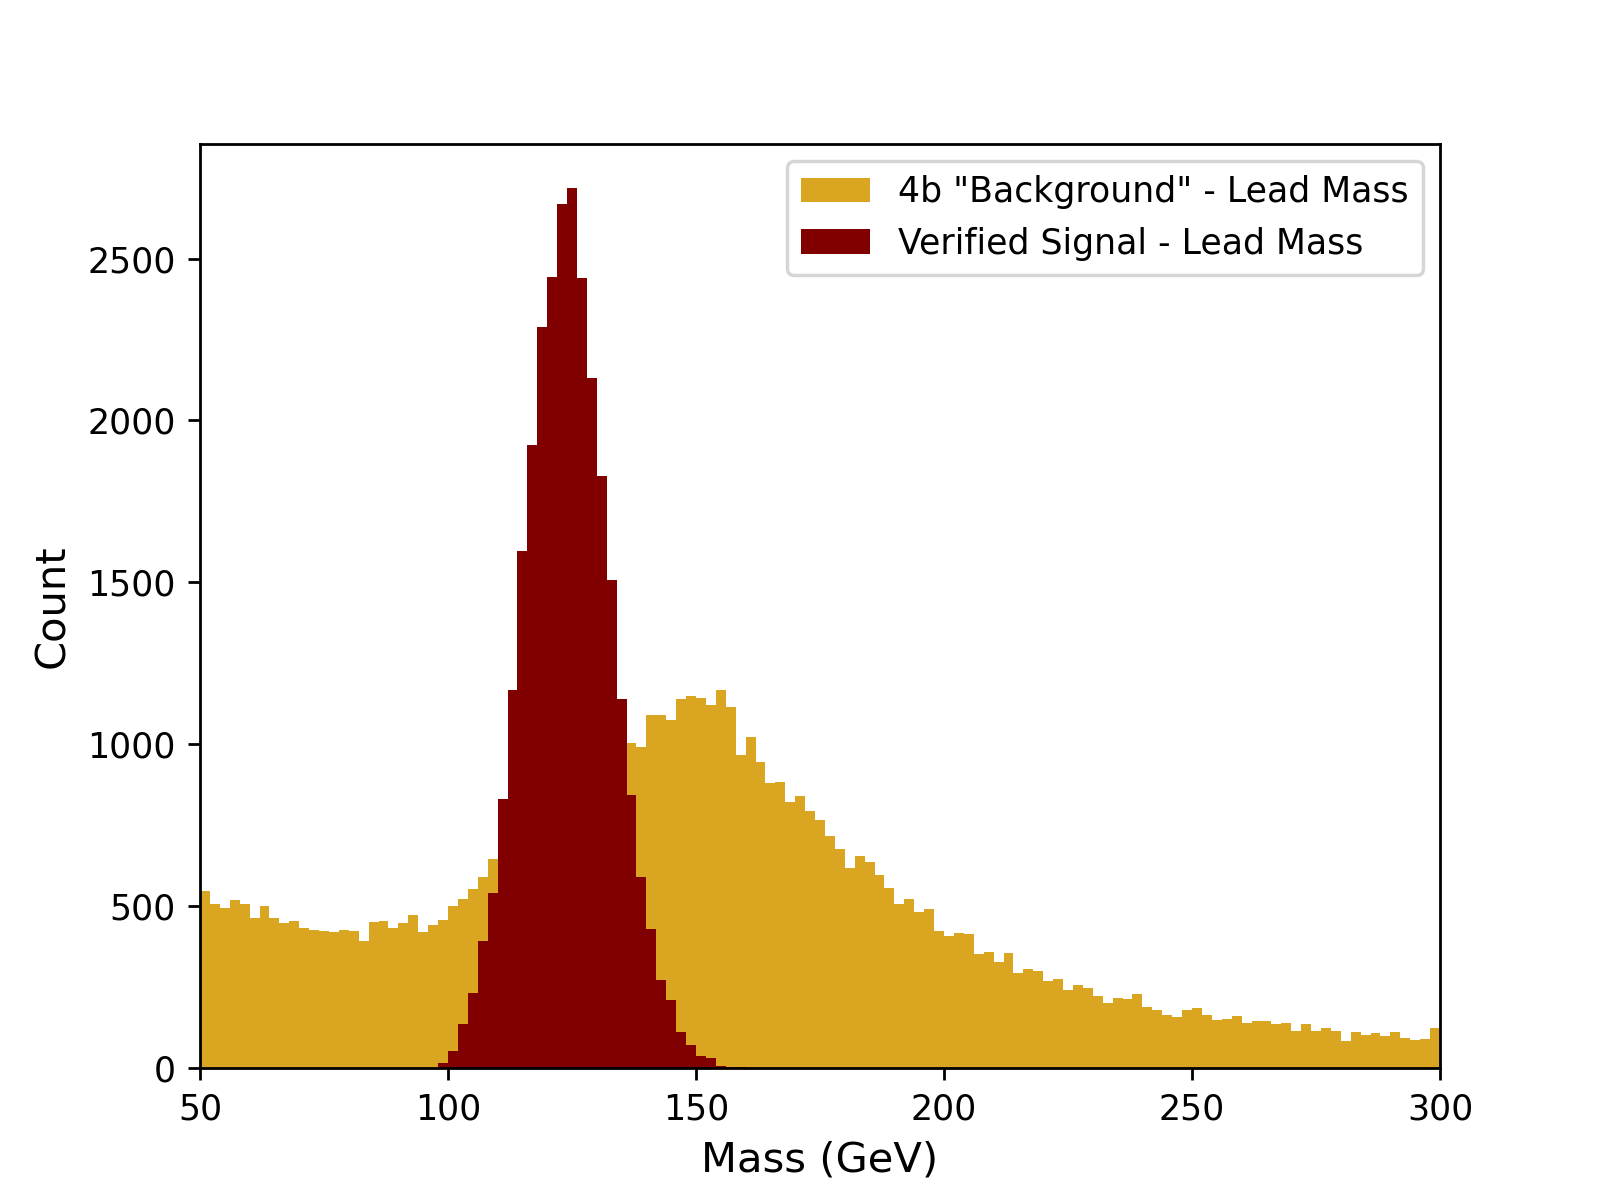

In [55]:
spacing=2 # spacing for histogram binning

plt.figure()

# We flatten arrays for visual purposes
## 4b Background lead mass hist
bbbb_lead_arr,bbbb_lead_bins,bbbb_lead_patches=plt.hist(ak.flatten(dijet_bbbb.ind_mass[:,:,0]),bins=np.arange(50,500,spacing),color='goldenrod',label='4b "Background" - Lead Mass')
## Signal lead mass hist
sig_lead_arr,sig_lead_bins,sig_lead_patches=plt.hist(ak.flatten(dijet_signal.closest_mass[:,:,0]),bins=np.arange(50,500,spacing),color='maroon',label='Verified Signal - Lead Mass')

# Zoom in for visual purposes
plt.xlim(50,300)

plt.xlabel('Mass (GeV)',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


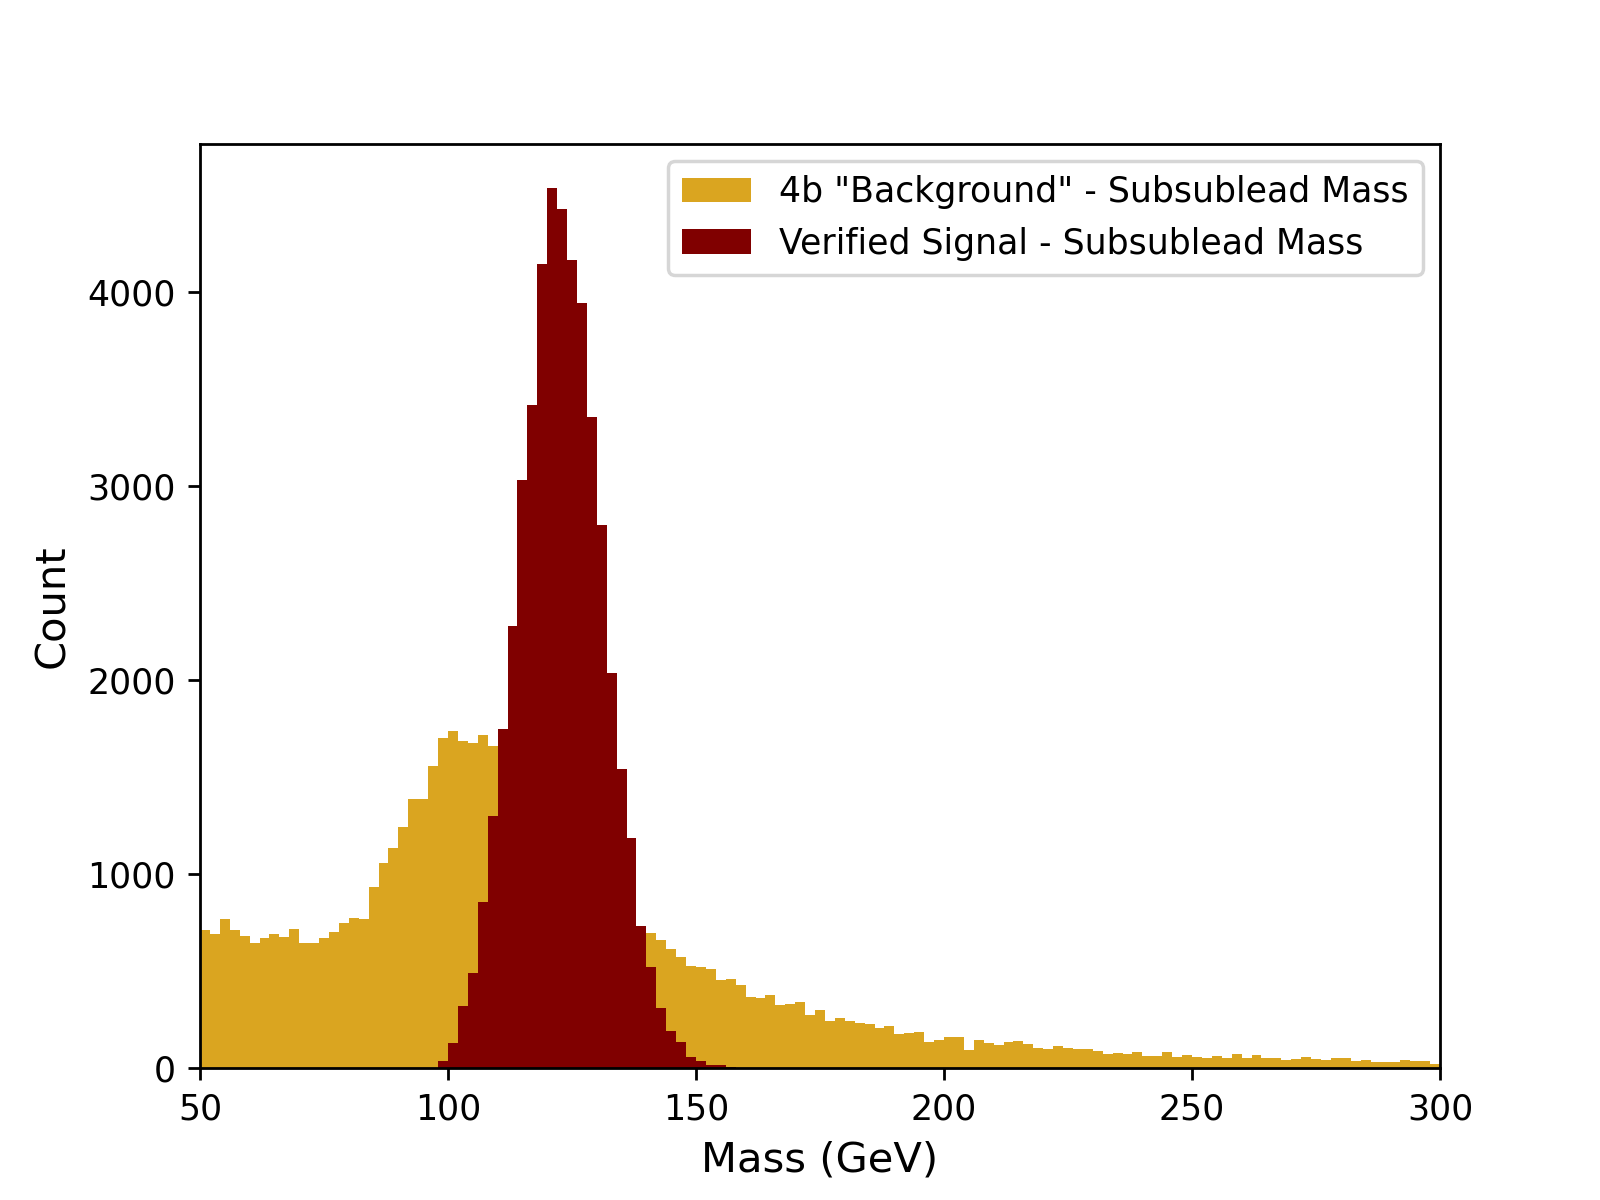

In [58]:
spacing=2 # spacing for histogram binning

plt.figure()

# We flatten arrays for visual purposes
## 4b Background sublead mass hist
bbbb_sublead_arr,bbbb_sublead_bins,bbbb_sublead_patches=plt.hist(ak.flatten(dijet_bbbb.ind_mass[:,:,1]),bins=np.arange(50,500,spacing),color='goldenrod',label='4b "Background" - Subsublead Mass')
## Signal sublead mass hist
sig_sublead_arr,sig_sublead_bins,sig_sublead_patches=plt.hist(ak.flatten(dijet_signal.closest_mass[:,:,1]),bins=np.arange(50,500,spacing),color='maroon',label='Verified Signal - Subsublead Mass')

# Zoom in for visual purposes
plt.xlim(50,300)

plt.xlabel('Mass (GeV)',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.legend()
plt.show()

### Getting 4b excluded dataset 
(ie. point that we excluded because it was closest to the Higgs mass)

In [61]:
dijet_bbbb['excluded_mass']=(events_bbbb.jet[:,pairings[0]]+events_bbbb.jet[:,pairings[1]]).mass 

# Then can assign to pass distances that are greater than the minima -- gives True/False values
dijet_bbbb['excluded'] = dist_bbbb==dist_bbbb[bbbb_dist_sort][:,0]
print('T/F results =',dijet_bbbb.excluded)

# Input this for your masses -- this gives empty arrays for smallest distances
dijet_bbbb.excluded_mass=dijet_bbbb.excluded_mass[dijet_bbbb.excluded] #input result onto mass array -- get empty array for False value
print('Apply condition to masses:',dijet_bbbb.excluded)

# Repalce empty arrays with None so that it can be plotted
dijet_bbbb.excluded_mass=dijet_bbbb.excluded_mass[ak.any(dijet_bbbb.excluded_mass,axis=2,mask_identity=True)] #use ak.any to replace empty with None (so that it can be plotted)
print('Get "None" for empty array:',dijet_bbbb.excluded_mass)

T/F results = [[[False, False], [True, True], [False, ... False], [True, True], [False, False]]]
Apply condition to masses: [[[False, False], [True, True], [False, ... False], [True, True], [False, False]]]
Get "None" for empty array: [[None, [129, 108], None], [None, None, ... 126], None], [None, [111, 106], None]]


<IPython.core.display.Javascript object>


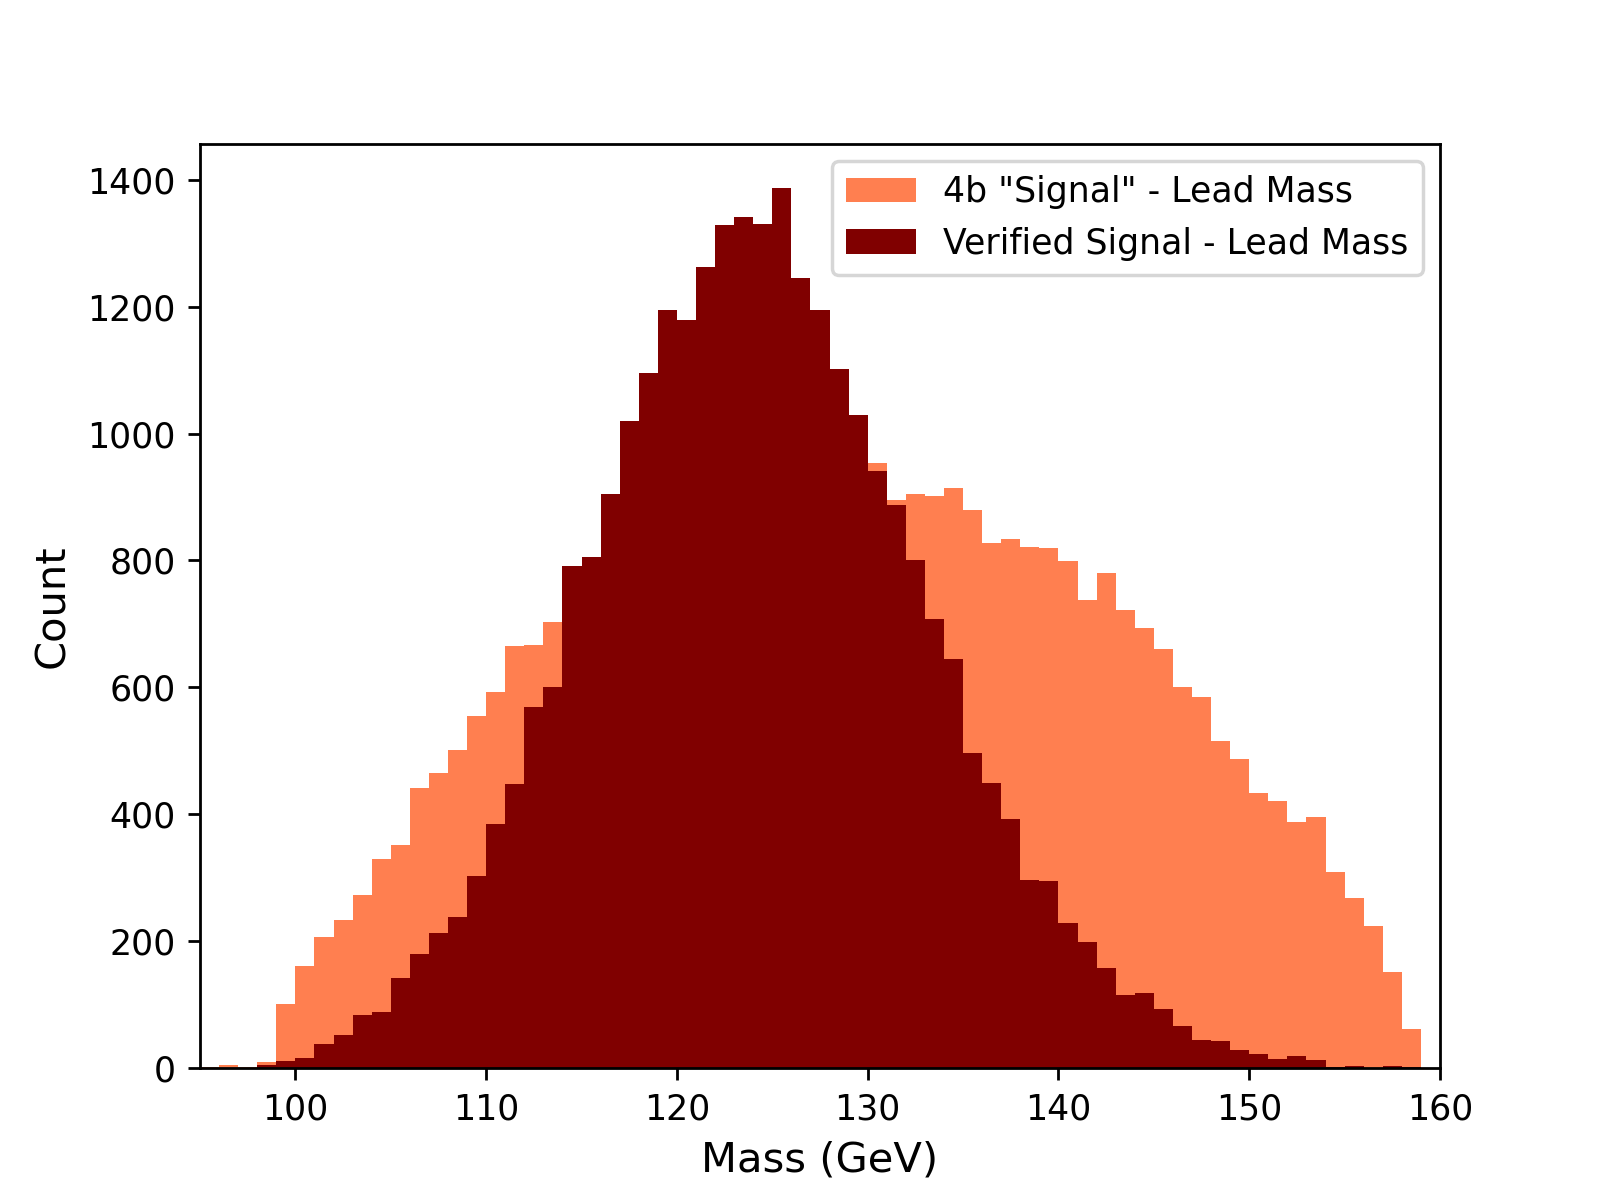

In [62]:
spacing=1 # spacing for histogram binning

plt.figure()

# We flatten arrays for visual purposes
## 4b signal lead mass hist
bbbb_excluded_lead_arr,bbbb_excluded_lead_bins,bbbb_excluded_lead_patches=plt.hist(ak.flatten(dijet_bbbb.excluded_mass[:,:,0]),bins=np.arange(50,500,spacing),color='coral',label='4b "Signal" - Lead Mass')
## Signal lead mass hist
sig_lead_arr,sig_lead_bins,sig_lead_patches=plt.hist(ak.flatten(dijet_signal.closest_mass[:,:,0]),bins=np.arange(50,500,spacing),color='maroon',label='Verified Signal - Lead Mass')

# Zoom in for visual purposes
plt.xlim(95,160)

plt.xlabel('Mass (GeV)',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


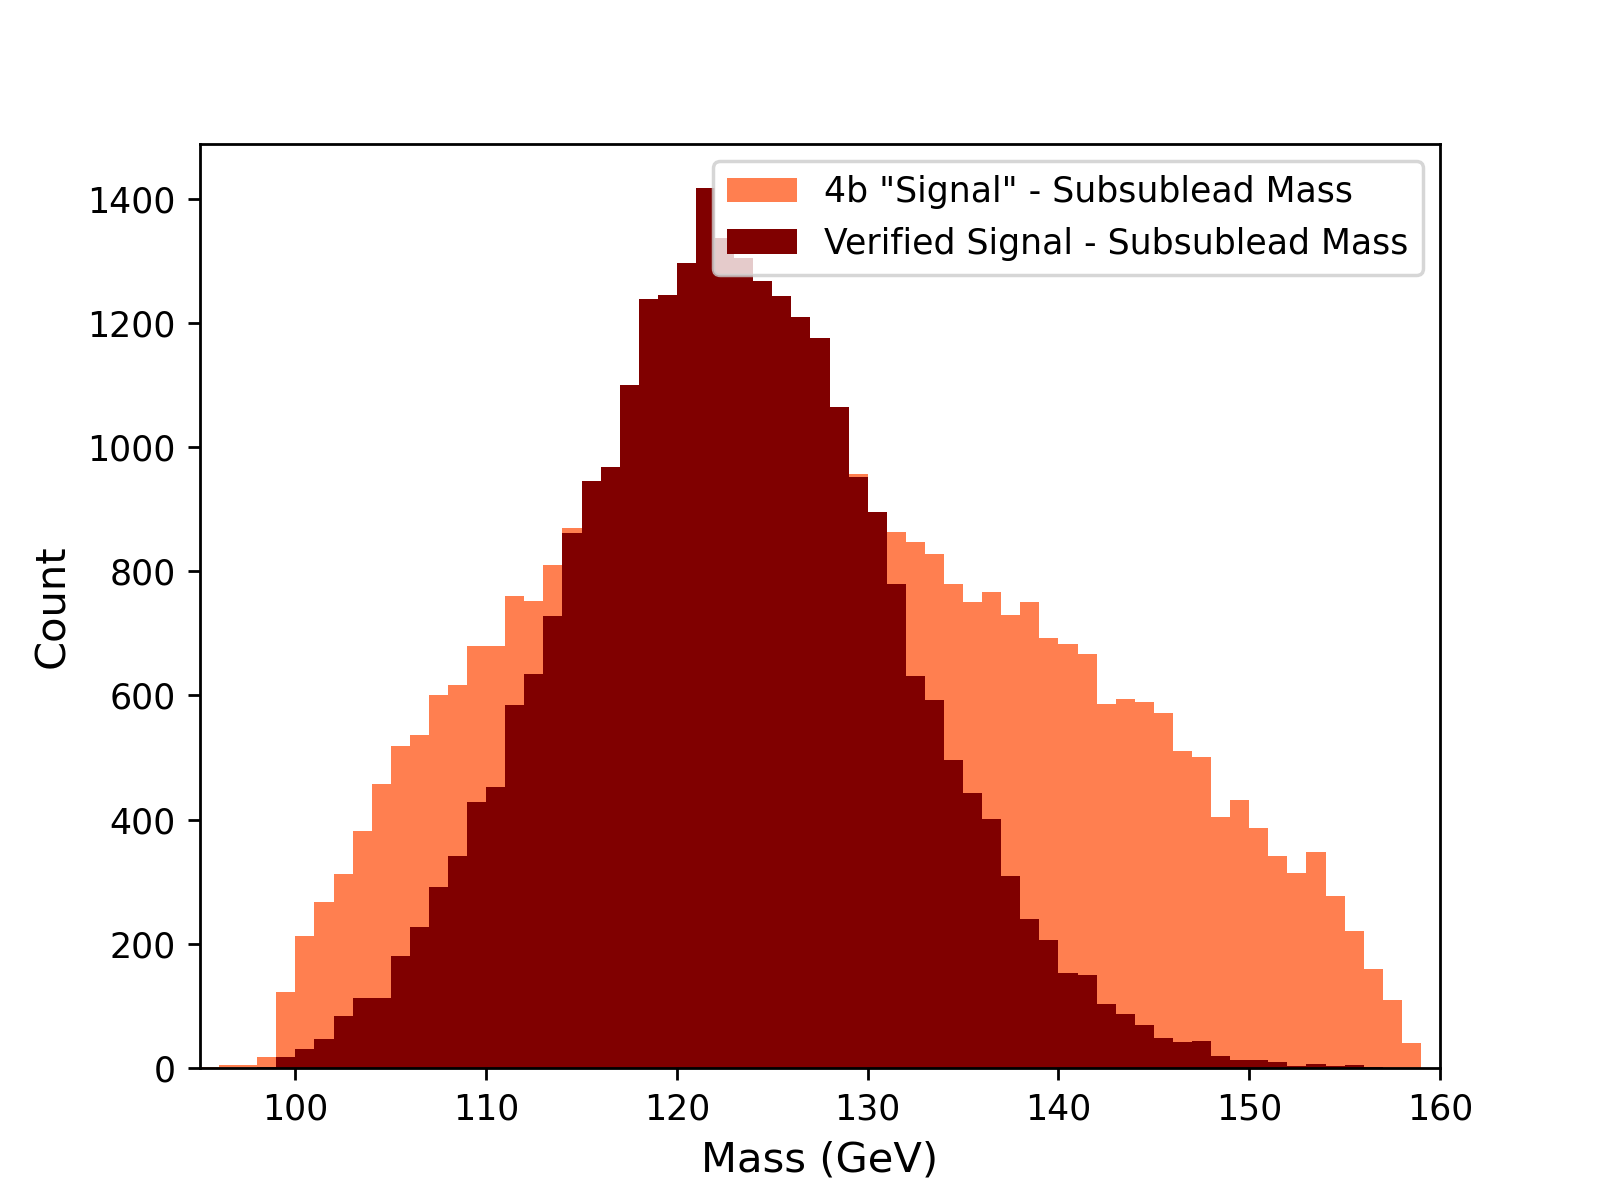

In [63]:
spacing=1 # spacing for histogram binning

plt.figure()

# We flatten arrays for visual purposes
## 4b signal sublead mass hist
bbbb_excluded_sublead_arr,bbbb_excluded_sublead_bins,bbbb_excluded_sublead_patches=plt.hist(ak.flatten(dijet_bbbb.excluded_mass[:,:,1]),bins=np.arange(50,500,spacing),color='coral',label='4b "Signal" - Subsublead Mass')
## Signal sublead mass hist
sig_sublead_arr,sig_sublead_bins,sig_sublead_patches=plt.hist(ak.flatten(dijet_signal.closest_mass[:,:,1]),bins=np.arange(50,500,spacing),color='maroon',label='Verified Signal - Subsublead Mass')

# Zoom in for visual purposes
plt.xlim(95,160)

plt.xlabel('Mass (GeV)',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


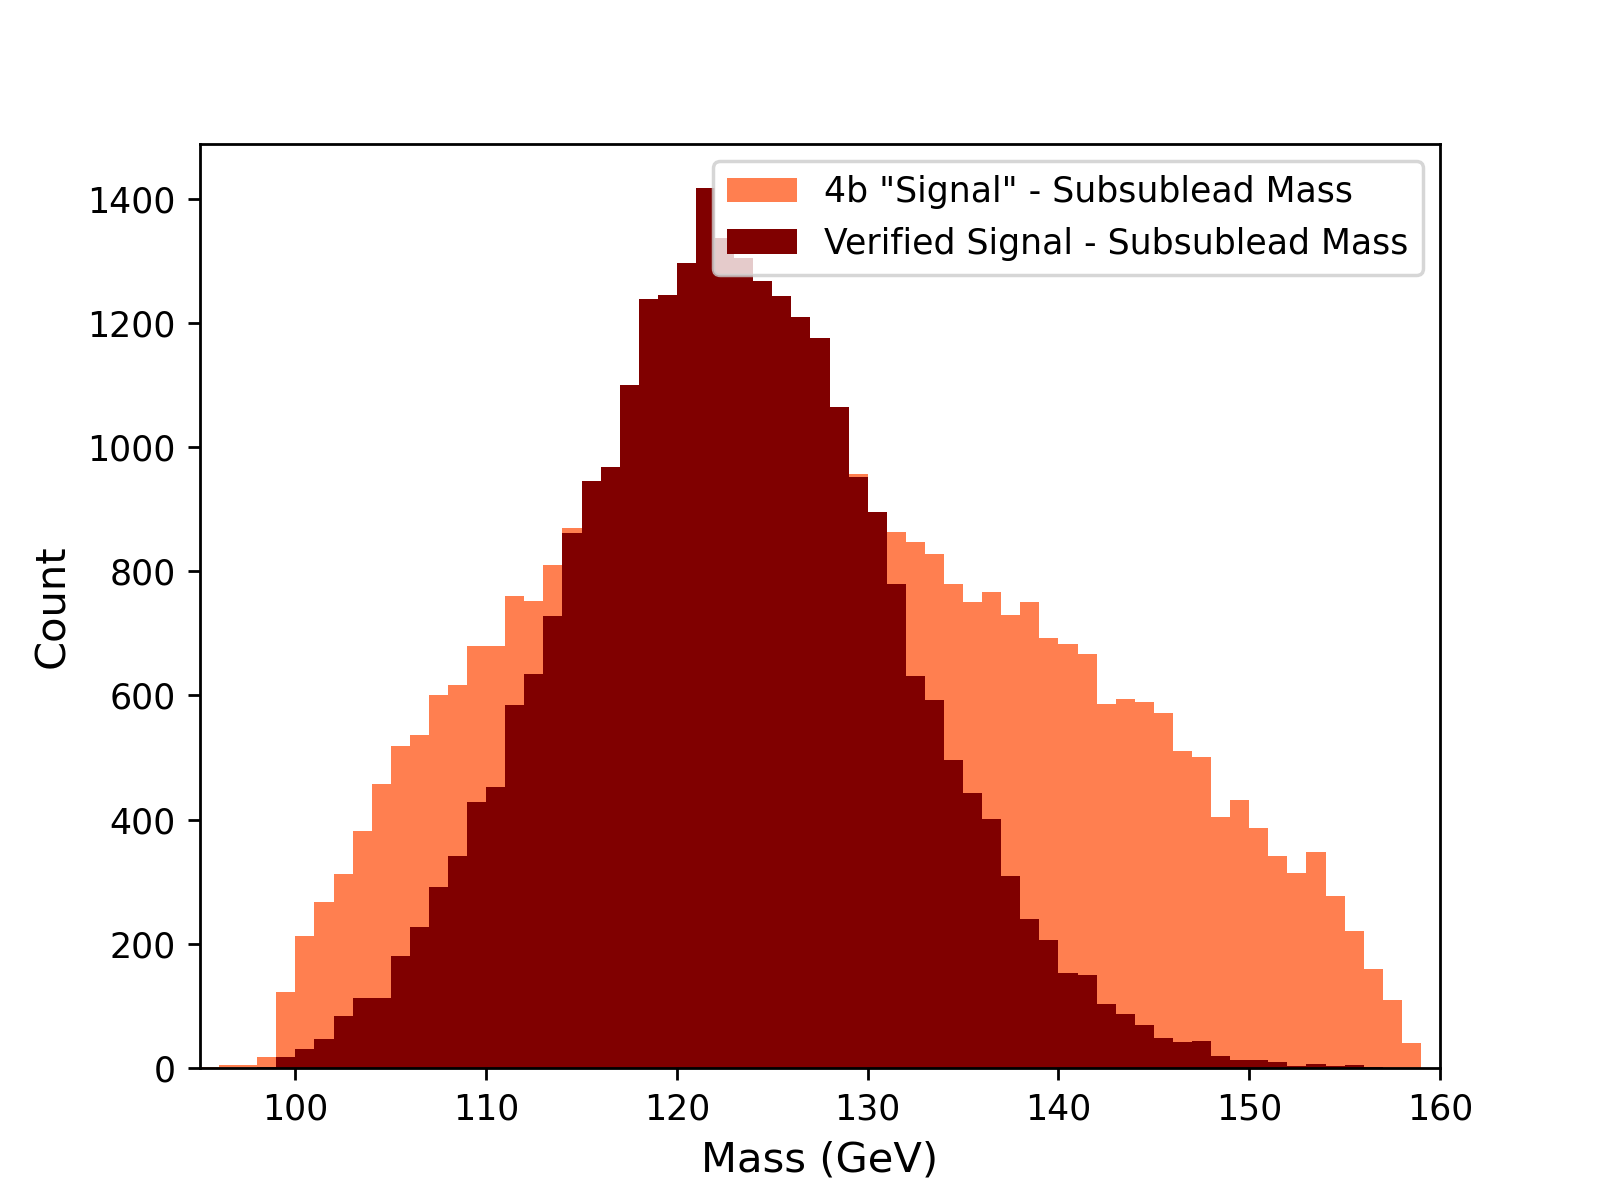

In [63]:
spacing=1 # spacing for histogram binning

plt.figure()

# We flatten arrays for visual purposes
## 4b signal sublead mass hist
bbbb_excluded_sublead_arr,bbbb_excluded_sublead_bins,bbbb_excluded_sublead_patches=plt.hist(ak.flatten(dijet_bbbb.excluded_mass[:,:,1]),bins=np.arange(50,500,spacing),color='coral',label='4b "Signal" - Subsublead Mass')
## Signal sublead mass hist
sig_sublead_arr,sig_sublead_bins,sig_sublead_patches=plt.hist(ak.flatten(dijet_signal.closest_mass[:,:,1]),bins=np.arange(50,500,spacing),color='maroon',label='Verified Signal - Subsublead Mass')

# Zoom in for visual purposes
plt.xlim(95,160)

plt.xlabel('Mass (GeV)',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.legend()
plt.show()

## Random Note
Could calculate dijet mass manually from invariant mass formula
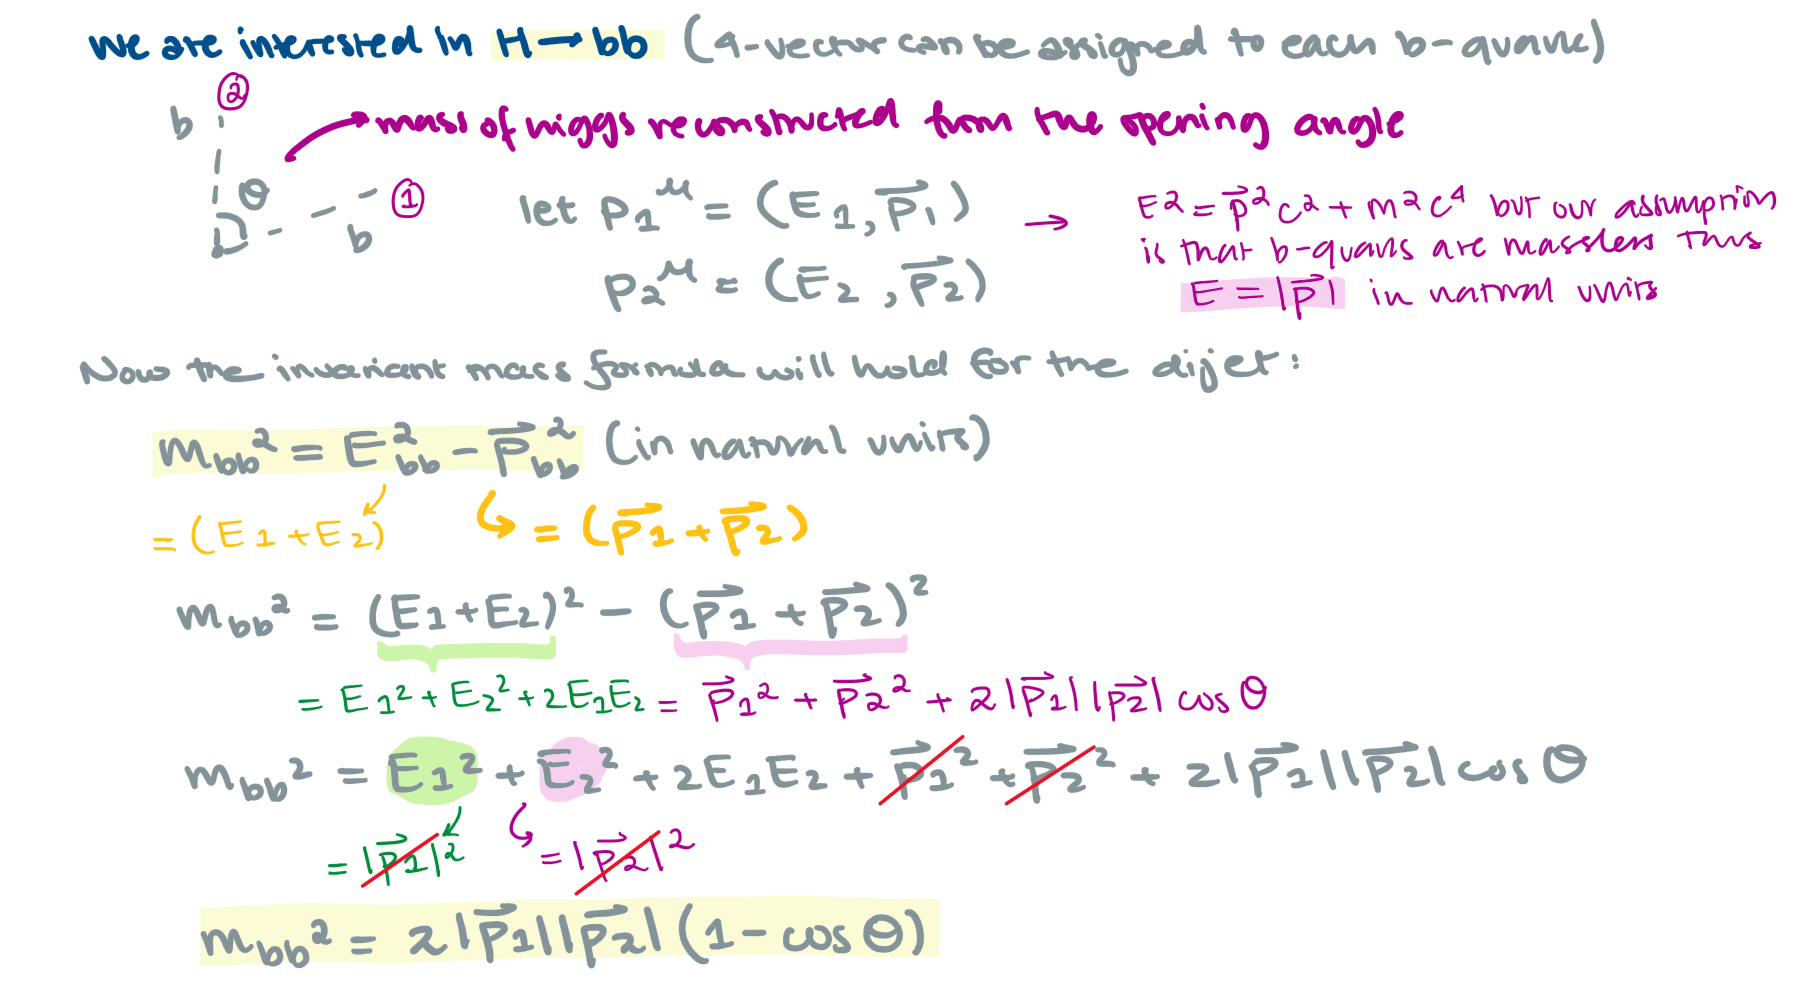

In [106]:
# How to manually calculate dijet mass
def dijet_mass(momenta1, momenta2,eta1,eta2,phi1,phi2):
    eta_diff=eta1-eta2
    phi_diff=phi1-phi2
    theta = np.sqrt(eta_diff**2+phi_diff**2)
    
    inv_mass=np.sqrt(2*np.abs(momenta1)*np.abs(momenta2)*(1-np.cos(theta)))
    
    return inv_mass